# Preparação dos Datasets

Aqui trataremos de:

- Selecionar os datasets com os quais trabalharemos

- Limpar dados

- Reduzir a dimensionalidade dos dados para um espaço 2D (se necessário)

- Reduzir a quantidade de rótulos dos nossos datasets para 2 rótulos (se necessário)

- Separar os nossos dados para teste e treinamento (do modelo)

OBS.: a parte de separação dos dados de treinamento e teste será feito junto com a parte de redução da quantidade de rótulos

## Criação das Funções de Limpeza, Redução e Plotagem

Aqui, vamos criar as funções que usaremos para limpar os dados, reduzir para 2 dimensões e plotar eles de acordo com seus rótulos:

### Limpeza

Vamos criar uma função que faz a limpeza dos dados, que consistirá apenas em:

- Eliminar dados duplicados
- Eliminar dados null/None/NaN

In [1]:
import pandas as pd

def cleanData(data):
    
    dataframe = pd.DataFrame(data=data.data, columns=data.feature_names)
    dataframe['target'] = data.target

    dataframe = dataframe.dropna()
    dataframe = dataframe.drop_duplicates()

    return dataframe

Usaremos essa função mais a frente.

### Redução de Dimensão

Agora que importamos e limpamos todos os nossos datasets, vamos criar uma função que faz a redução de dimensionalidade dos dados para 2D:

In [2]:
from sklearn.decomposition import PCA

def reduce2DPCA(df):
    # Assuming last column is 'target'
    features = df.iloc[:, :-1]
    labels = df.iloc[:, -1]
    
    pca = PCA(n_components=2)
    reduced_features = pca.fit_transform(features)
    
    reduced_df = pd.DataFrame(reduced_features, columns=['x', 'y'])
    reduced_df['label'] = labels.reset_index(drop=True)
    
    return reduced_df

Usaremos essa função mais a frente.

### Plotagem

Agora que importamos, limpamos e reduzimos para 2D todos os nossos datasets, vamos criar uma função que plota os nossos dados com cores diferentes para cada rótulo para podermos identificar quais são linearmente separáveis dos outros:

In [3]:
import matplotlib.pyplot as plt

def plotData(df, title):

    if not {'x', 'y', 'label'}.issubset(df.columns):
        print("DataFrame must contain 'x', 'y', and 'label' columns.")
        return
    
    plt.figure(figsize=(10, 6))
    
    uniqueLabels = df['label'].unique()
    for label in uniqueLabels:
        subset = df[df['label'] == label]
        plt.scatter(subset['x'], subset['y'], label=label, alpha=0.6)

    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.title(title)
    plt.show()

Agora vamos usar essa última função para plotar os nossos dados e verificar visualmente quais rotulos são linearmente separáveis.

### Juntando essas funções

Juntando as funções que:

- Reduz os dados para 2D
- Plota dos dados

Temos a seguinte função:

In [4]:
def reduceAndPlot(dataframe, title):
    
    plotData(reduce2DPCA(dataframe), title)

## Seleção e Limpeza dos Datasets

Aqui vamos selecionar e importar os datasets que usaremos para esse trabalho.

Usaremos dados de diferentes fontes para aplicar nosso modelo a diversas situações e ver seu desempenho mediante os diferentes desafios.

Os primeiros datasets que utilizaremos estarão contidos no scikit learn: 

- Iris Plants

    Para mais informações, acesse:

    https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris

In [5]:
from sklearn.datasets import load_iris

irisData = load_iris()

irisDataframe = cleanData(irisData)

irisDataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  149 non-null    float64
 1   sepal width (cm)   149 non-null    float64
 2   petal length (cm)  149 non-null    float64
 3   petal width (cm)   149 non-null    float64
 4   target             149 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 6.4 KB


- Forest Covertypes

    Para mais informações, acesse:

    https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_covtype.html#sklearn.datasets.fetch_covtype

In [6]:
from sklearn.datasets import fetch_covtype

forestData = fetch_covtype()

forestDataframe = cleanData(forestData)

forestDataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           581012 non-null  float64
 1   Aspect                              581012 non-null  float64
 2   Slope                               581012 non-null  float64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  float64
 4   Vertical_Distance_To_Hydrology      581012 non-null  float64
 5   Horizontal_Distance_To_Roadways     581012 non-null  float64
 6   Hillshade_9am                       581012 non-null  float64
 7   Hillshade_Noon                      581012 non-null  float64
 8   Hillshade_3pm                       581012 non-null  float64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  float64
 10  Wilderness_Area_0                   581012 non-null  float64
 11  Wilderness_Area_1         

- Wine Recognition

    Para mais informações, acesse:

    https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine

In [7]:
from sklearn.datasets import load_wine

wineData = load_wine()

wineDataframe = cleanData(wineData)

wineDataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

- Optical Recognition of Handwritten Digits

    Para mais informações, acesse:

    https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits

In [8]:
from sklearn.datasets import load_digits

digiData = load_digits()

digiDataframe = cleanData(digiData)

digiDataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

- Diabetes

    Para mais informações, acesse:

    https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes

In [9]:
from sklearn.datasets import load_diabetes

diabData = load_diabetes()

diabDataframe = cleanData(diabData)

diabDataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


- Breast Cancer Wisconsin (Diagnostic)

    Para mais informações, acesse:

    https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer

In [10]:
from sklearn.datasets import load_breast_cancer

cancerData = load_breast_cancer()

cancerDataframe = cleanData(cancerData)

cancerDataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

Para variarmos as fontes dos nossos dados, os próximos 2 serão datasets obtidos do kaggle:

- Most Streamed Spotify Songs 2023

    Para mais informações, acesse:

    https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023

In [11]:
spotifyDataframe = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')

spotifyDataframe = spotifyDataframe.dropna()
spotifyDataframe = spotifyDataframe.drop_duplicates()

In [12]:
# Transform object columns that are 
# int-like (streams, in_deezer_playlists, 
# in_shazam_charts) into int columns

import numpy as np

# Function to attempt to convert to int, returning NaN if it fails
def tryConvertInt(x):
    try:
        return int(x)
    except ValueError:
        return np.nan

spotifyDataframe['streams'] = spotifyDataframe['streams'].apply(tryConvertInt)
spotifyDataframe['in_deezer_playlists'] = spotifyDataframe['in_deezer_playlists'].apply(tryConvertInt)
spotifyDataframe['in_shazam_charts'] = spotifyDataframe['in_shazam_charts'].apply(tryConvertInt)

spotifyDataframe.dropna(subset=['streams', 'in_deezer_playlists', 'in_shazam_charts'], inplace=True)

# Avoid NaN transforming dataframe to float
spotifyDataframe['streams'] = spotifyDataframe['streams'].astype(int)
spotifyDataframe['in_deezer_playlists'] = spotifyDataframe['in_deezer_playlists'].astype(int)
spotifyDataframe['in_shazam_charts'] = spotifyDataframe['in_shazam_charts'].astype(int)


# Map the binary column 'mode' to 0 and 1

mode_mapping = {
    'minor': 0,
    'major': 1
}

spotifyDataframe['mode'] = spotifyDataframe['mode'].str.lower().map(mode_mapping)
spotifyDataframe = spotifyDataframe.dropna(subset=['mode'])


# Delete the track_name and artist(s)_name columns

spotifyDataframe = spotifyDataframe.drop(columns=['track_name', 'artist(s)_name'])


# Make the key column the last 
# column and rename it to target

colKey = spotifyDataframe['key']
spotifyDataframe.drop(columns=['key'], inplace=True)
spotifyDataframe['target'] = colKey


spotifyDataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 748 entries, 0 to 952
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   artist_count          748 non-null    int64 
 1   released_year         748 non-null    int64 
 2   released_month        748 non-null    int64 
 3   released_day          748 non-null    int64 
 4   in_spotify_playlists  748 non-null    int64 
 5   in_spotify_charts     748 non-null    int64 
 6   streams               748 non-null    int32 
 7   in_apple_playlists    748 non-null    int64 
 8   in_apple_charts       748 non-null    int64 
 9   in_deezer_playlists   748 non-null    int32 
 10  in_deezer_charts      748 non-null    int64 
 11  in_shazam_charts      748 non-null    int32 
 12  bpm                   748 non-null    int64 
 13  mode                  748 non-null    int64 
 14  danceability_%        748 non-null    int64 
 15  valence_%             748 non-null    int64 


- Mobile Price Classification

    Para mais informações, acesse:

    https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification

In [13]:
mobileDataframe = pd.read_csv('mobile.csv', encoding='ISO-8859-1')

mobileDataframe = mobileDataframe.dropna()
mobileDataframe = mobileDataframe.drop_duplicates()

# Make the price_range column the last 
# column and rename it to target

colPrice = mobileDataframe['price_range']
mobileDataframe.drop(columns=['price_range'], inplace=True)
mobileDataframe['target'] = colPrice

mobileDataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Por último, usamos as funções make_classification e make_blob do scikit learn para gerarmos 2 datasets aleatórios seguindo certos parâmetros. 

In [14]:
# make classification generated data:

from sklearn.datasets import make_classification

feat, targ = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, random_state=7)

genClassData = np.column_stack((feat, targ))

genClassDataframe = pd.DataFrame(genClassData, columns=["feature1", "feature2", "target"])

genClassDataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feature1  1000 non-null   float64
 1   feature2  1000 non-null   float64
 2   target    1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [15]:
# make_blobs generated data:

from sklearn.datasets import make_blobs

feat, targ = make_blobs(n_samples=1000, n_features=2, centers=2, random_state=11)

genBlobData = np.column_stack((feat, targ))

genBlobDataframe = pd.DataFrame(genBlobData, columns=["feature1", "feature2", "target"])

genBlobDataframe.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feature1  1000 non-null   float64
 1   feature2  1000 non-null   float64
 2   target    1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


## Redução da Quantidade de Rótulos do Datasets

Agora que temos todos os nossos datasets em dataframes e fizemos a limpeza necessária dos dados, vamos aplicar a função de redução e plotar os dados. 

Assim, poderemos verificar a separabilidade dos diferentes rótulos e consequentemente reduzir o número de rótulos.

### Iris Plants

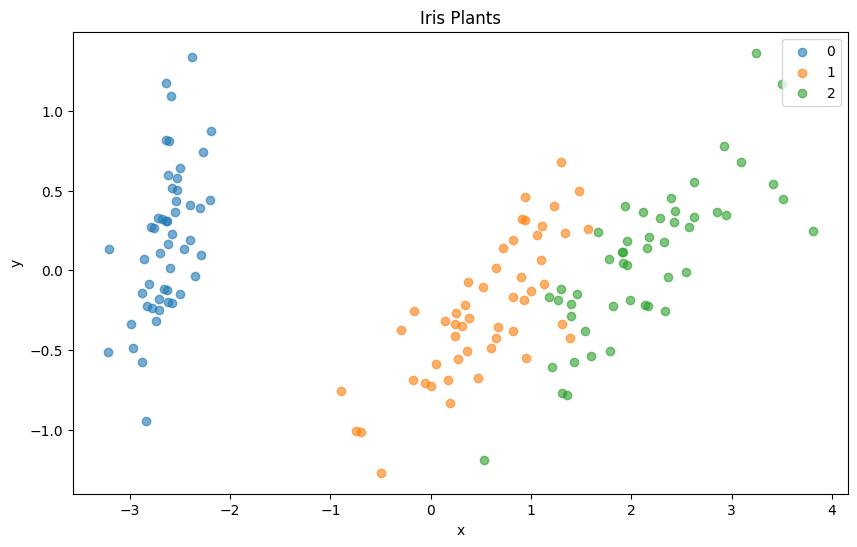

In [16]:
reduceAndPlot(irisDataframe, "Iris Plants")

Veja que no nosso dataset acima, os rótulos 1 e 2 são claramente separáveis do rótulo 0, logo, vamos juntar 1 e 2 como 'Other', reduzindo o número de rótulos e plotar novamente.

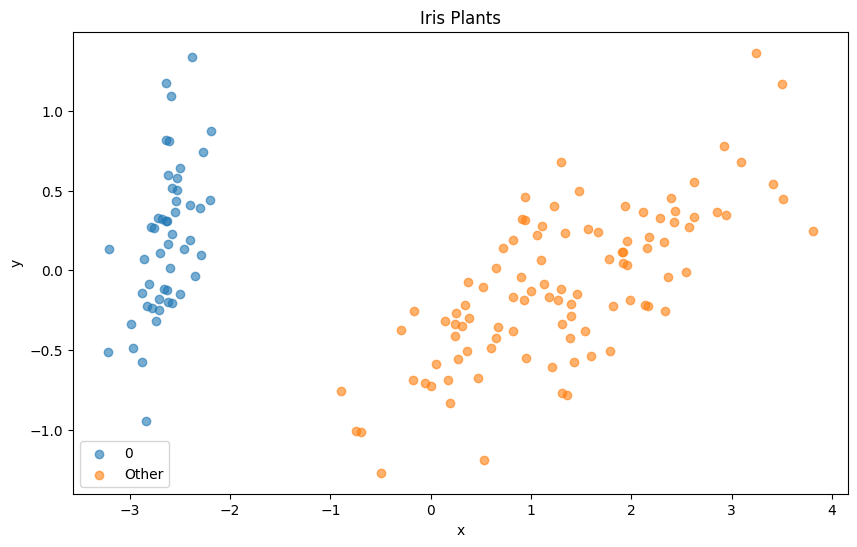

In [17]:
newTargIrisDataframe = irisDataframe.copy()

newTargIrisDataframe['target'] = newTargIrisDataframe['target'].apply(lambda x: 0 if x == 0 else 'Other')

reducedIrisDataframe = reduce2DPCA(newTargIrisDataframe)

plotData(reducedIrisDataframe, "Iris Plants")

Visto que os dados são claramente separáveis, vamos separar 30% dos nossos dados para teste e os outros 70% para treinamento:

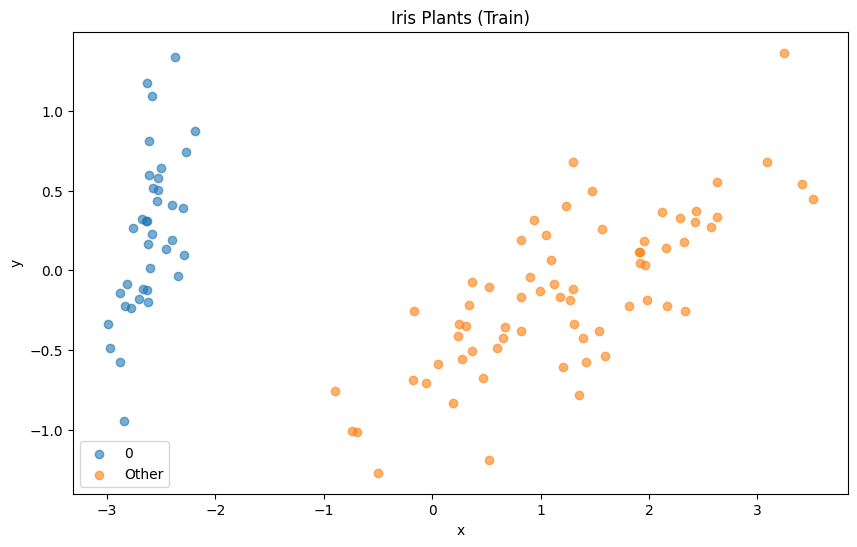

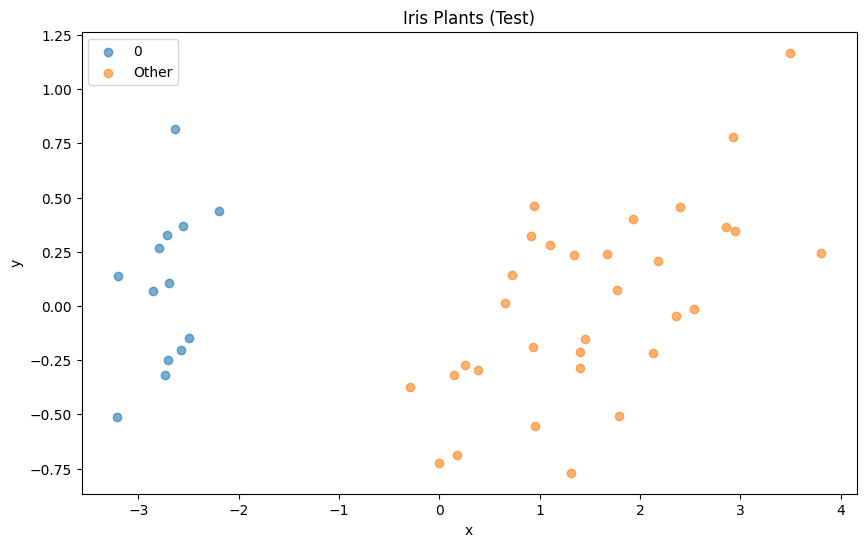

In [18]:
trainIrisDataframe = reducedIrisDataframe.sample(frac=0.7, random_state=12)
testIrisDataframe = reducedIrisDataframe.drop(trainIrisDataframe.index)

plotData(trainIrisDataframe, "Iris Plants (Train)")
plotData(testIrisDataframe, "Iris Plants (Test)")

trainIrisDataframe.to_csv('./cleanedDatasets/iris/train.csv', index=False)
testIrisDataframe.to_csv('./cleanedDatasets/iris/test.csv', index=False)

### Forest Covertypes

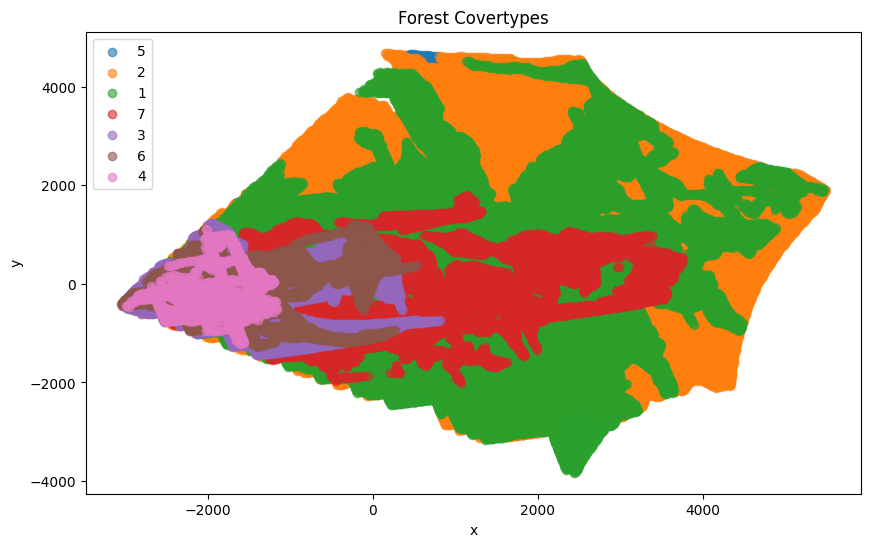

In [19]:
reduceAndPlot(forestDataframe, "Forest Covertypes")

Nesse caso, verificar um padrão de separabilidade já se torna mais difícil. Quando plotamos todos os rótulos contra todos os rótulos contra todos, vemos que os dados realmente não são separáveis:

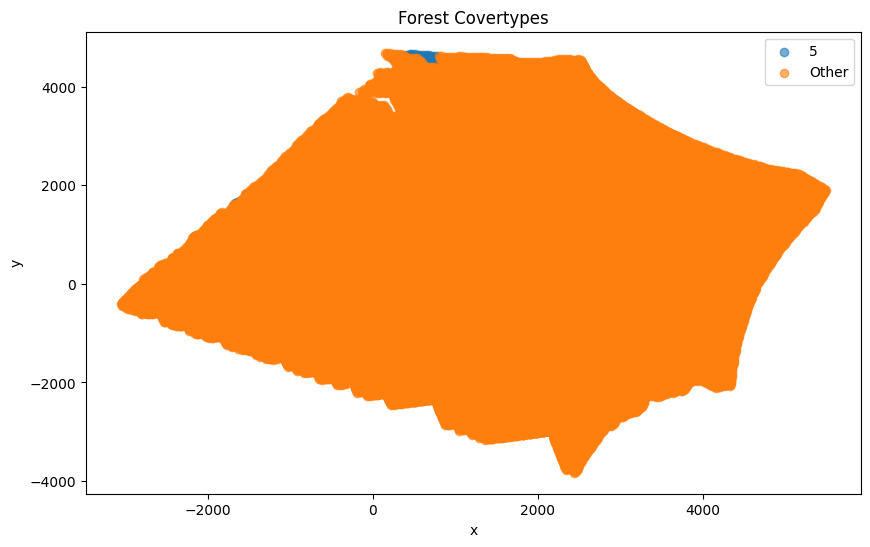

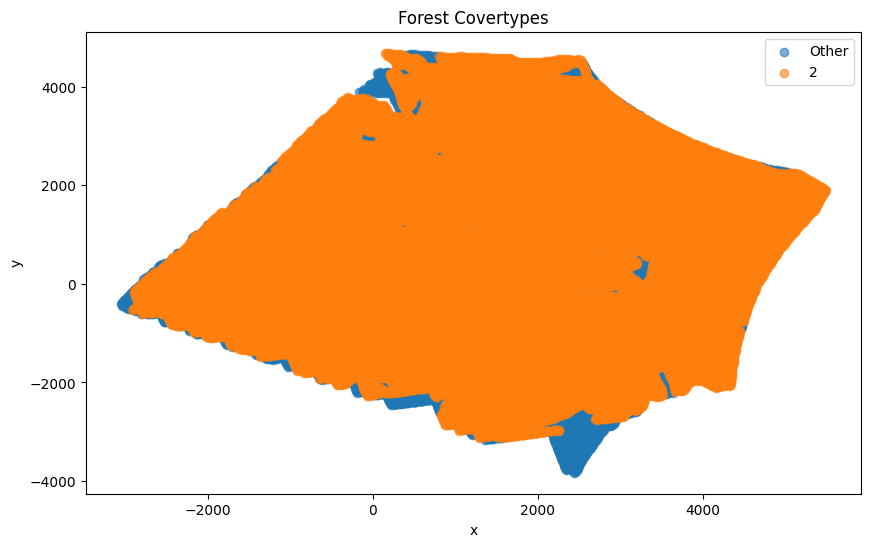

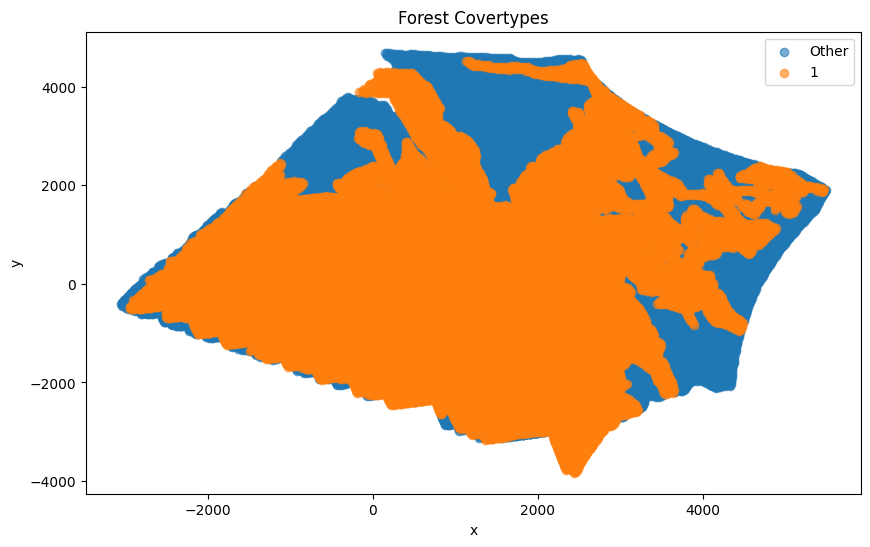

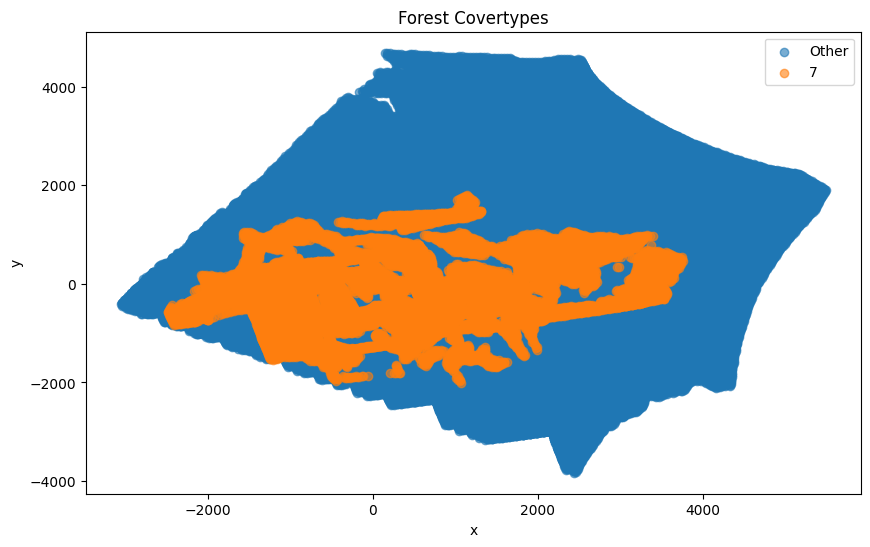

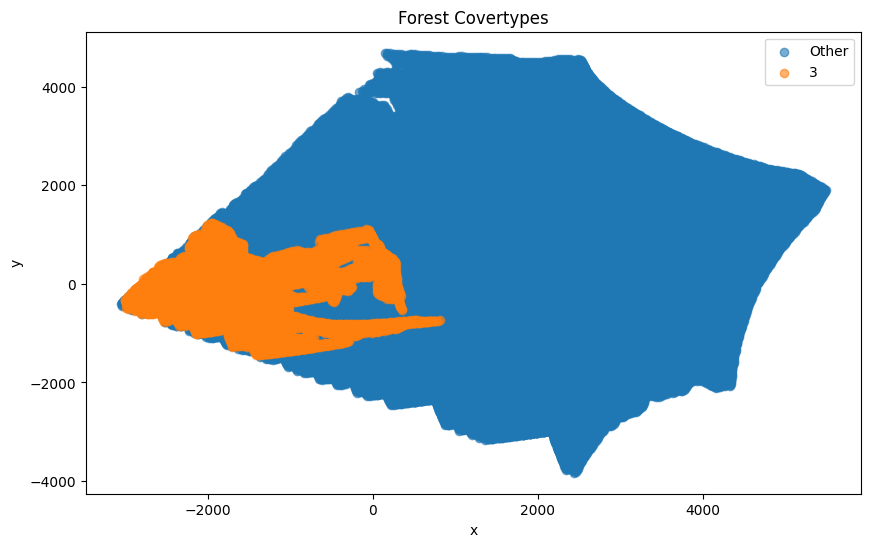

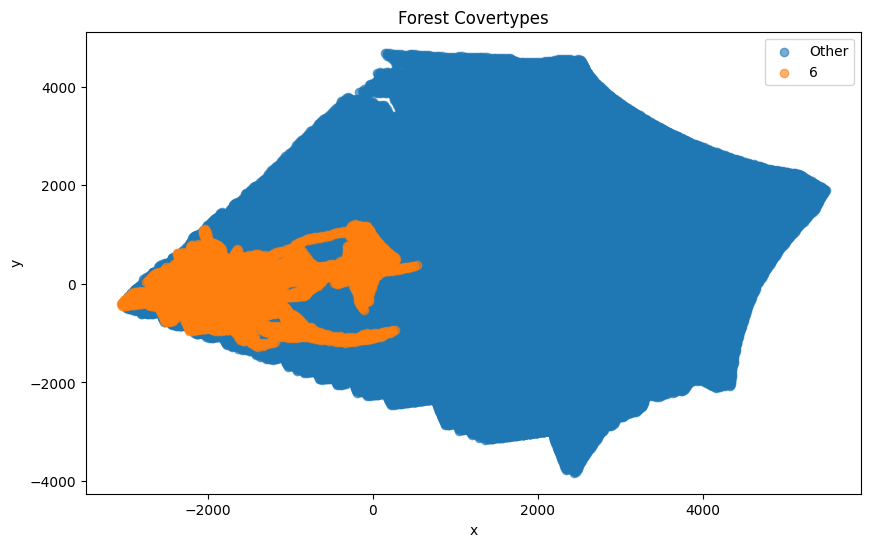

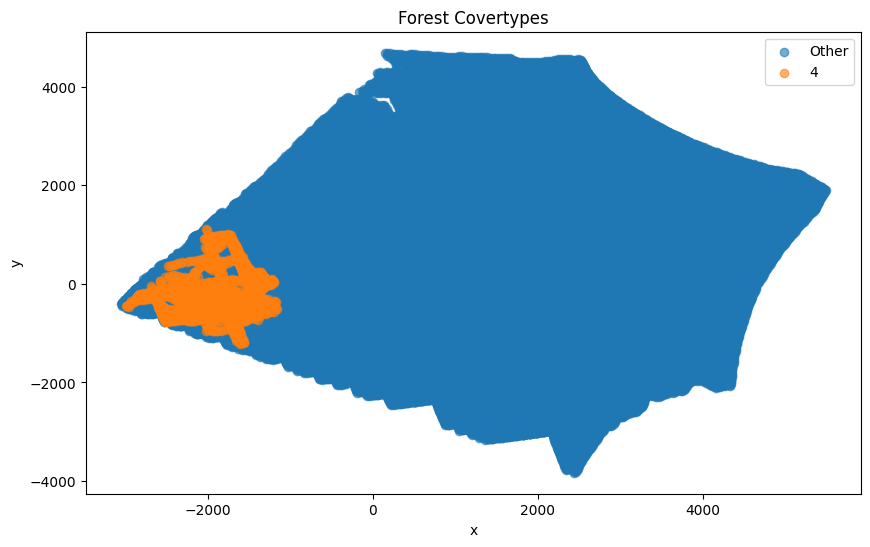

In [20]:
uniqueForestTargs = forestDataframe['target'].unique()

for targ in uniqueForestTargs:
    
    newTargForestDataframe = forestDataframe.copy()
    
    newTargForestDataframe['target'] = newTargForestDataframe['target'].apply(lambda x: targ if x == targ else 'Other')

    reduceAndPlot(newTargForestDataframe, "Forest Covertypes")

Porém se tivessemos que escolher um rótulo mais separável, escolheriamos o rótulo 4 contra todos os outros ('Other'). Portanto vamos selecionar os rótulos 4 e todos os outros para compor nosso dataset que usarmemos com nosso algoritmo.

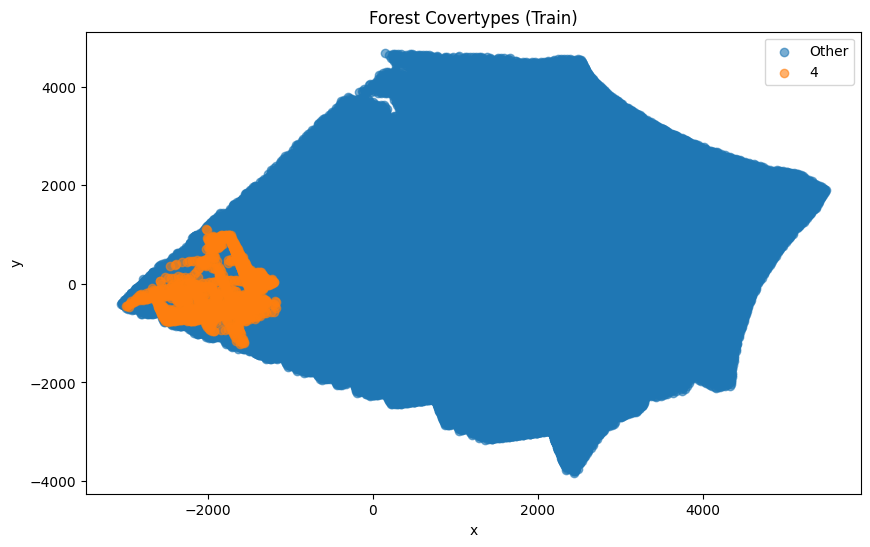

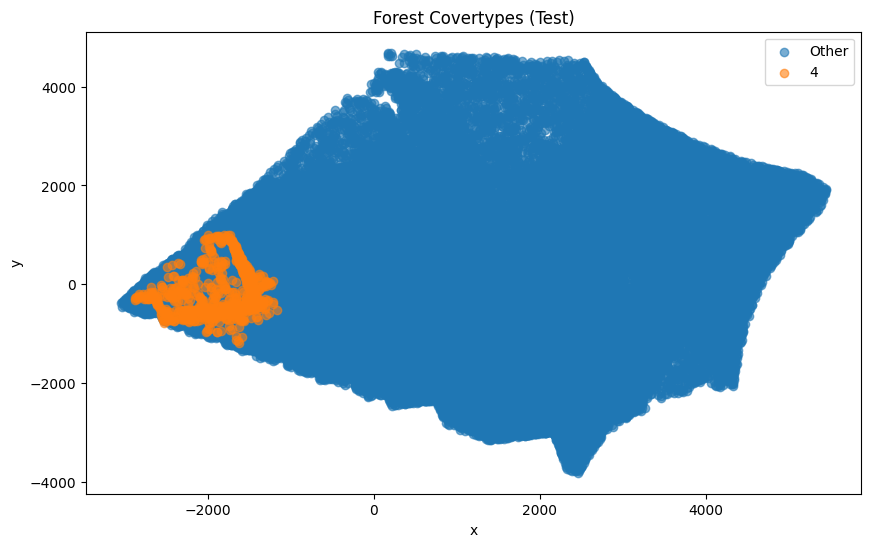

In [21]:
newTargForestDataframe = forestDataframe.copy()
    
newTargForestDataframe['target'] = newTargForestDataframe['target'].apply(lambda x: 4 if x == 4 else 'Other')

reducedForestDataframe = reduce2DPCA(newTargForestDataframe)

trainForestDataframe = reducedForestDataframe.sample(frac=0.7, random_state=12)
testForestDataframe = reducedForestDataframe.drop(trainForestDataframe.index)

plotData(trainForestDataframe, "Forest Covertypes (Train)")
plotData(testForestDataframe, "Forest Covertypes (Test)")

trainForestDataframe.to_csv('./cleanedDatasets/forestCover/train.csv', index=False)
testForestDataframe.to_csv('./cleanedDatasets/forestCover/test.csv', index=False)

### Wine Recognition

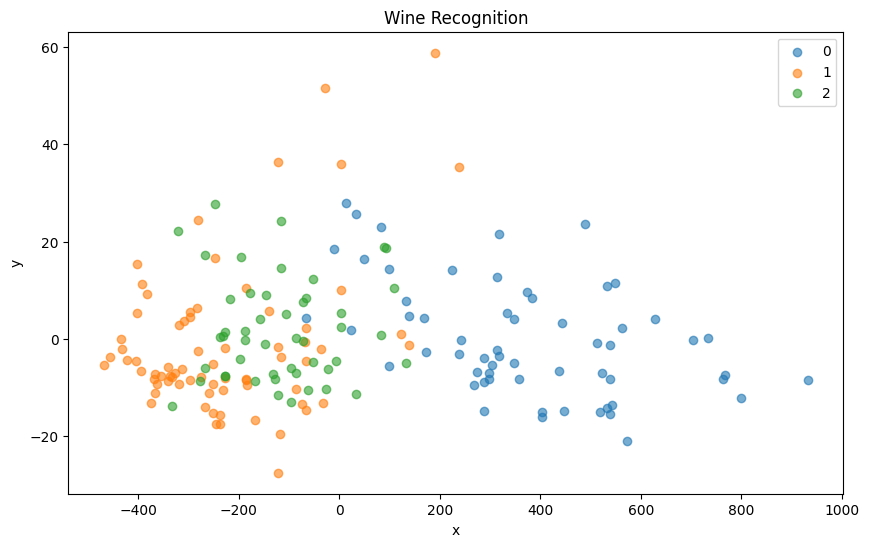

In [22]:
reduceAndPlot(wineDataframe, "Wine Recognition")

Podemos ver que esses dados também não são separáveis. Porém se fossemos escolher um rótulo mais separado possível, seria o rótulo 0 contra os outros ('Other')

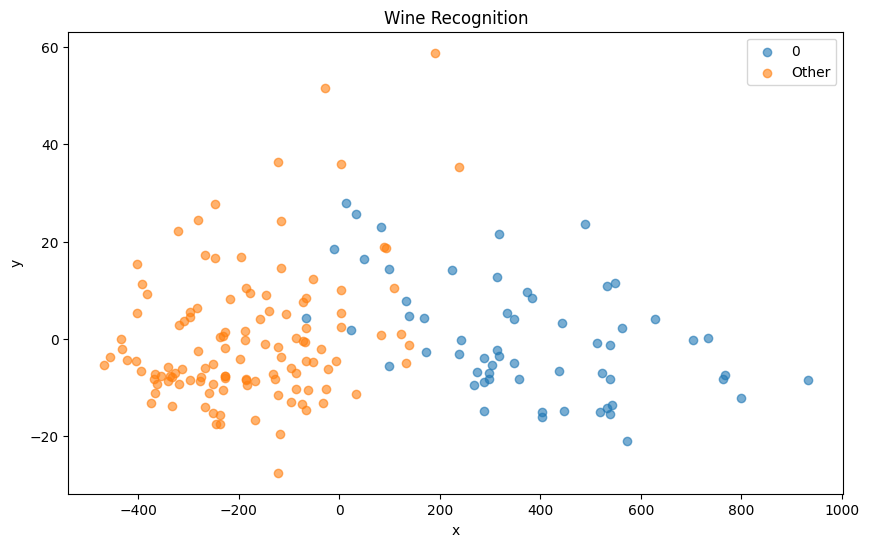

In [23]:
newTargWineDataframe = wineDataframe.copy()

newTargWineDataframe['target'] = newTargWineDataframe['target'].apply(lambda x: 0 if x == 0 else 'Other')

reducedWineDataframe = reduce2DPCA(newTargWineDataframe)

plotData(reducedWineDataframe, "Wine Recognition")

Agora, vamos separar nossos dados de treinamento dos dados de teste:

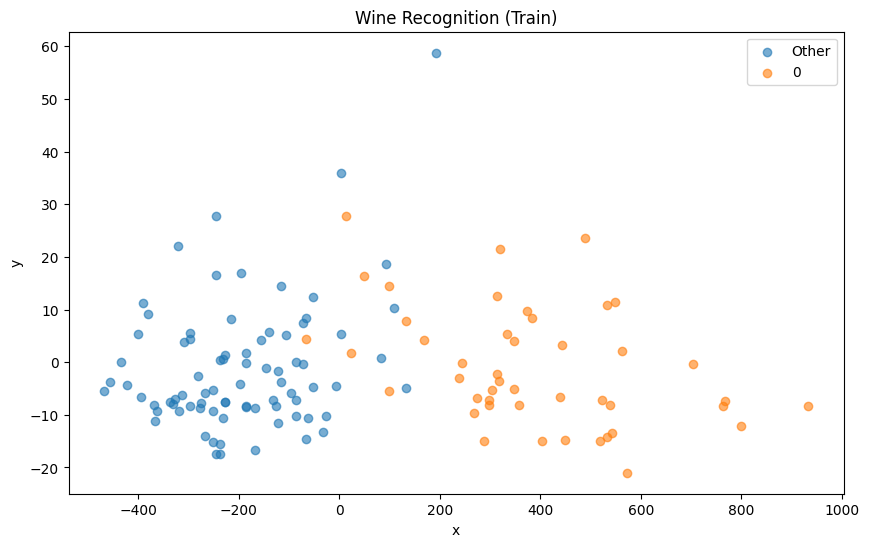

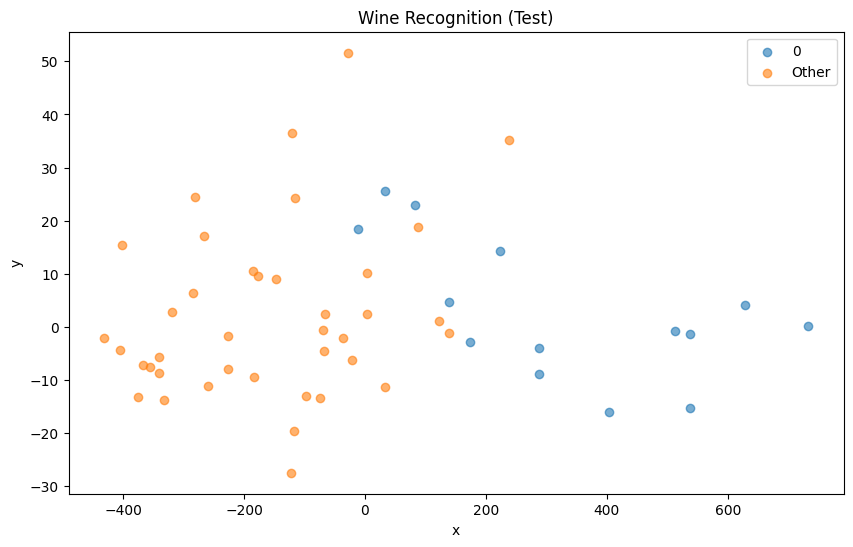

In [24]:
trainWineDataframe = reducedWineDataframe.sample(frac=0.7, random_state=12)
testWineDataframe = reducedWineDataframe.drop(trainWineDataframe.index)

plotData(trainWineDataframe, "Wine Recognition (Train)")
plotData(testWineDataframe, "Wine Recognition (Test)")

trainWineDataframe.to_csv('./cleanedDatasets/wineRecognition/train.csv', index=False)
testWineDataframe.to_csv('./cleanedDatasets/wineRecognition/test.csv', index=False)

Dado que os dados de treinamento não são separáveis, vamos duplicar os dados de treinamento do wine recognition dataset, e na duplicação vamos induzir uma separabilidade nos dados de treinamento para comparar os resultados do modelo tanto no dataset original (não separável) quanto no dataset com a separabilidade induzida durante o treinamento.

Para isso, eliminaremos todos os dados na faixa vertical delimitada pelas seguintes verticais:

- A reta vertical que corta o dado mais a esquerda do rótulo 0
- A reta vertical que corta o dado mais a direita do rótulo 'Other'

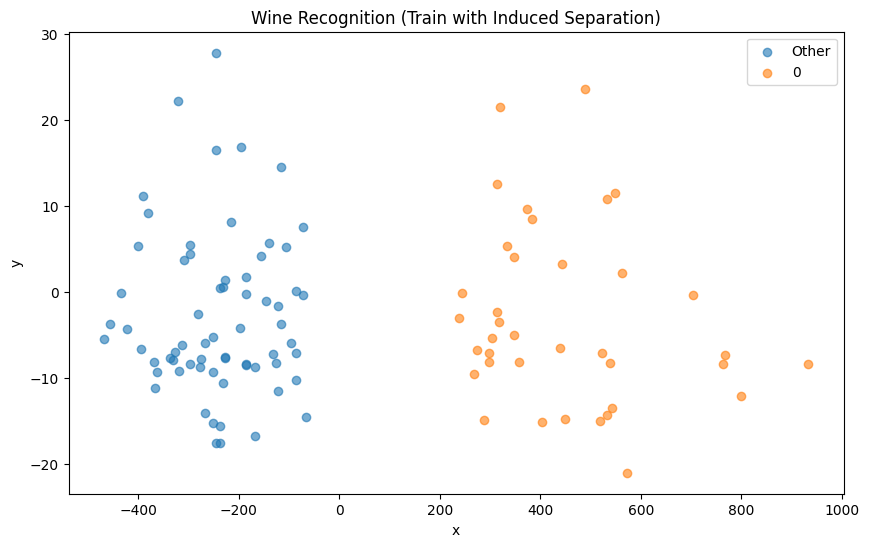

In [25]:
leftmostX = trainWineDataframe[trainWineDataframe['label'] == 0]['x'].min()

rightmostX = trainWineDataframe[trainWineDataframe['label'] == 'Other']['x'].max()

separatInducedWineDataframe = trainWineDataframe[~((trainWineDataframe['x'] >= leftmostX) & (trainWineDataframe['x'] <= rightmostX))]

plotData(separatInducedWineDataframe, "Wine Recognition (Train with Induced Separation)")

separatInducedWineDataframe.to_csv('./cleanedDatasets/wineRecognition/trainInducedSeparation.csv', index=False)


### Optical Recognition of Handwritten Digits

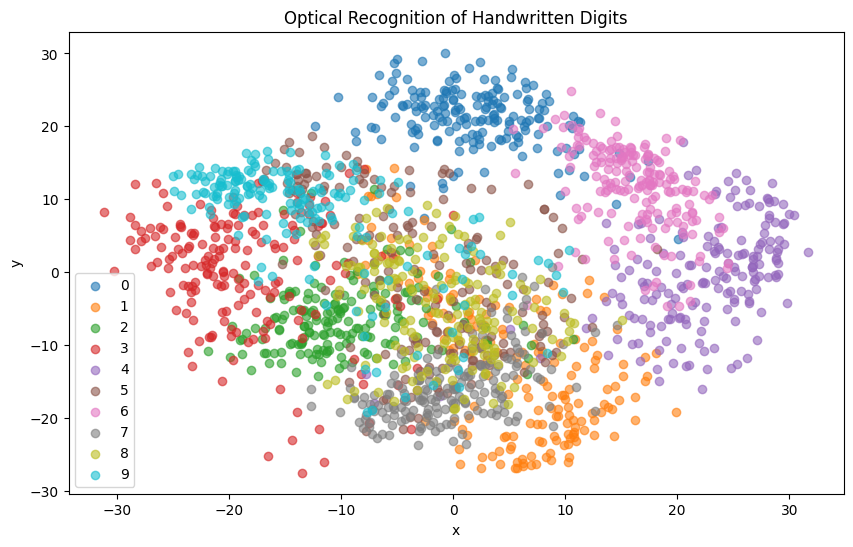

In [26]:
reduceAndPlot(digiDataframe, "Optical Recognition of Handwritten Digits")

Podemos ver que esses dados também não são separáveis. Porém se fossemos escolher um rótulo mais separado possível, seria o rótulo 0 contra os outros ('Other')

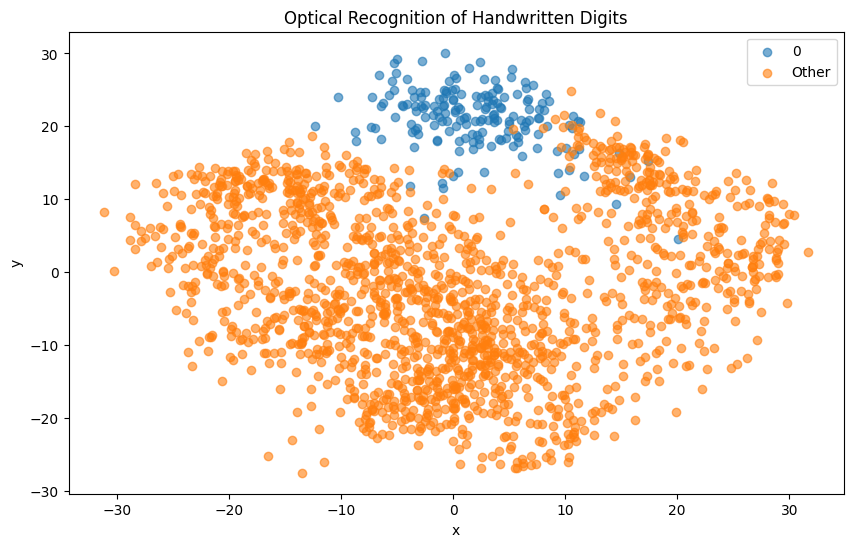

In [27]:
newTargDigiDataframe = digiDataframe.copy()

newTargDigiDataframe['target'] = newTargDigiDataframe['target'].apply(lambda x: 0 if x == 0 else 'Other')

reducedDigiDataframe = reduce2DPCA(newTargDigiDataframe)

plotData(reducedDigiDataframe, "Optical Recognition of Handwritten Digits")

Agora, vamos separar nossos dados de treinamento dos dados de teste:

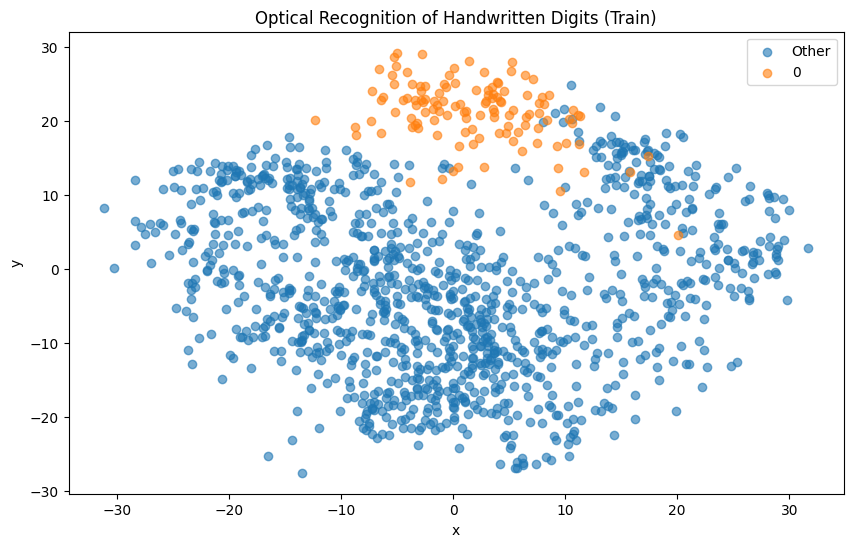

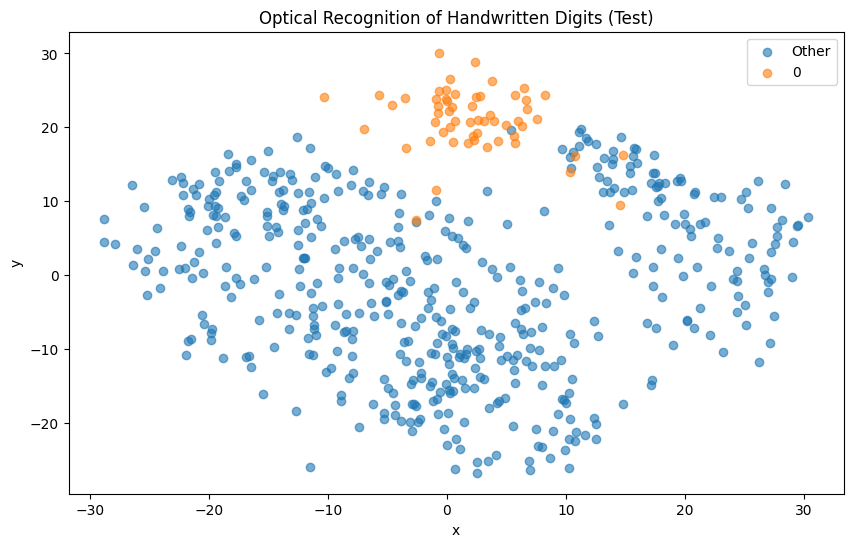

In [28]:
trainDigiDataframe = reducedDigiDataframe.sample(frac=0.7, random_state=12)
testDigiDataframe = reducedDigiDataframe.drop(trainDigiDataframe.index)

plotData(trainDigiDataframe, "Optical Recognition of Handwritten Digits (Train)")
plotData(testDigiDataframe, "Optical Recognition of Handwritten Digits (Test)")

trainDigiDataframe.to_csv('./cleanedDatasets/digitsRecognition/train.csv', index=False)
testDigiDataframe.to_csv('./cleanedDatasets/digitsRecognition/test.csv', index=False)

Dado que os dados de treinamento não são separáveis, vamos duplicar os dados de treinamento, e na duplicação vamos induzir uma separabilidade nos dados de treinamento para comparar os resultados do modelo tanto no dataset original (não separável) quanto no dataset com a separabilidade induzida durante o treinamento.

Para isso, eliminaremos todos os dados rotulados como 'Other' que estão acima da reta horizontal que corta o dado de rótulo 0 com menor valor de y.

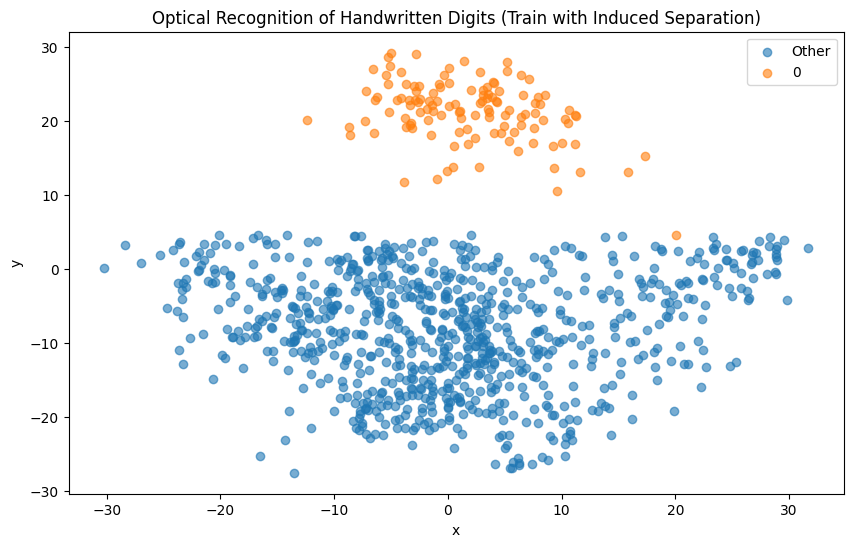

In [29]:
lowestY = trainDigiDataframe[trainDigiDataframe['label'] == 0]['y'].min()

separatInducedDigiDataframe = trainDigiDataframe[~((trainDigiDataframe['label'] == 'Other') & (trainDigiDataframe['y'] > lowestY))]

plotData(separatInducedDigiDataframe, "Optical Recognition of Handwritten Digits (Train with Induced Separation)")

separatInducedDigiDataframe.to_csv('./cleanedDatasets/digitsRecognition/trainInducedSeparation.csv', index=False)


### Diabetes

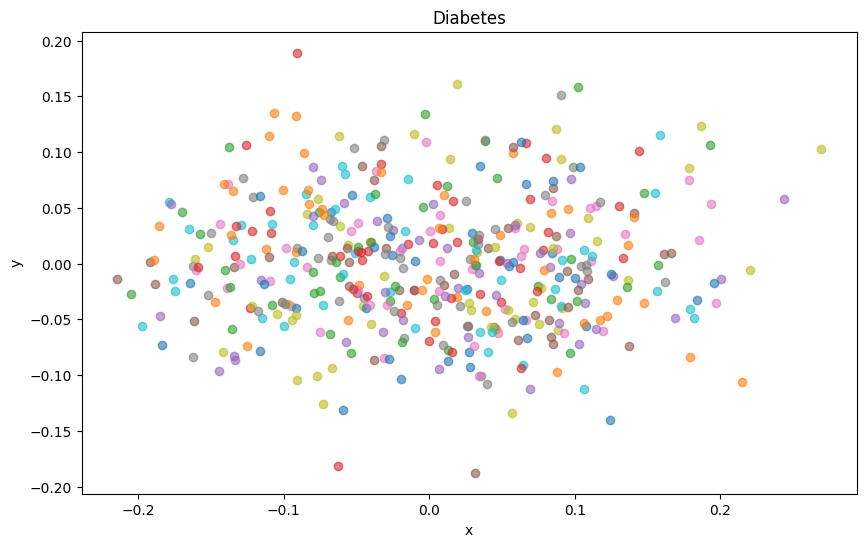

In [30]:
reducedDiabDataframe = reduce2DPCA(diabDataframe)

def plotDataNoLegend(df, title):

    if not {'x', 'y', 'label'}.issubset(df.columns):
        print("DataFrame must contain 'x', 'y', and 'label' columns.")
        return
    
    plt.figure(figsize=(10, 6))
    
    uniqueLabels = df['label'].unique()
    for label in uniqueLabels:
        subset = df[df['label'] == label]
        plt.scatter(subset['x'], subset['y'], alpha=0.6)

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(title)
    plt.show()

plotDataNoLegend(reducedDiabDataframe, "Diabetes")

Podemos ver que esses dados também não são separáveis. Vamos escolher o reduzir os rotulos para o rótulo que mais se repete contra todos os outros:

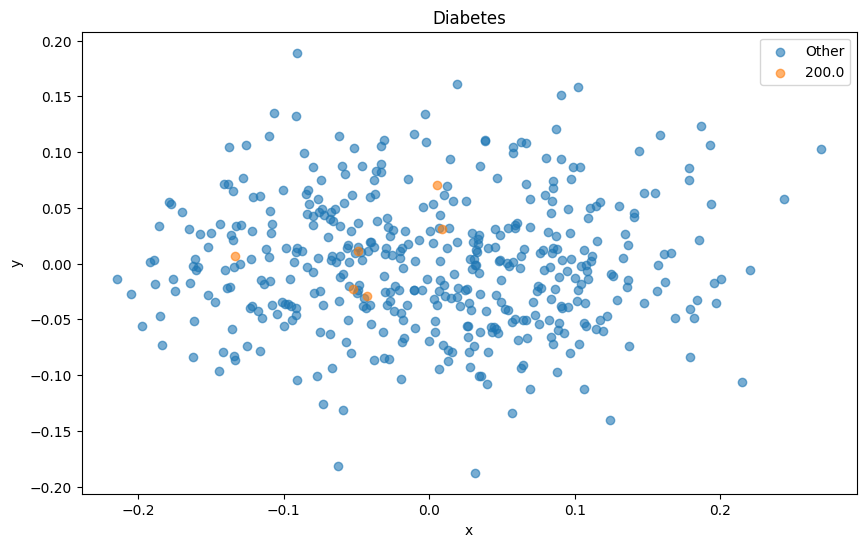

In [31]:
mostCommonLabel = reducedDiabDataframe['label'].value_counts().idxmax()

newTargDiabDataframe = reducedDiabDataframe.copy()

newTargDiabDataframe['label'] = newTargDiabDataframe['label'].apply(lambda x: mostCommonLabel if x == mostCommonLabel else 'Other')

newReducedDiabDataframe = reduce2DPCA(newTargDiabDataframe)

plotData(newReducedDiabDataframe, "Diabetes")

Agora vamos separar os dados de treinamento e teste

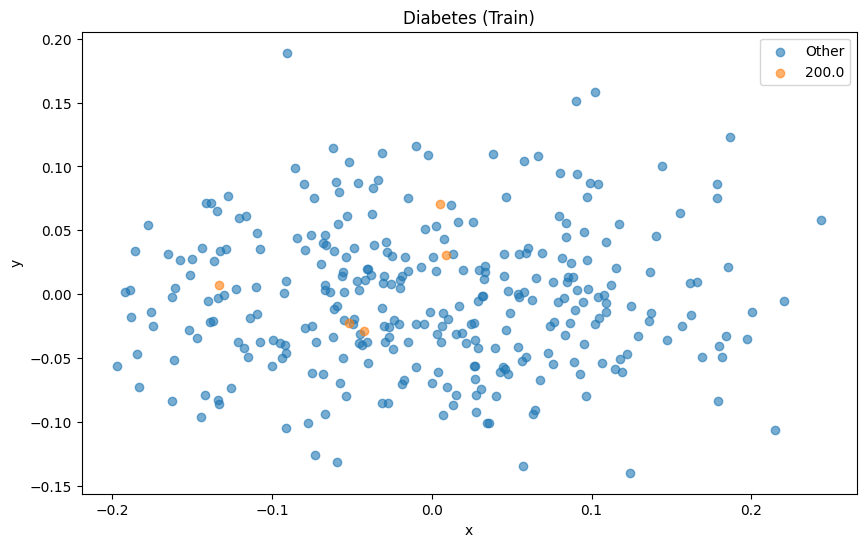

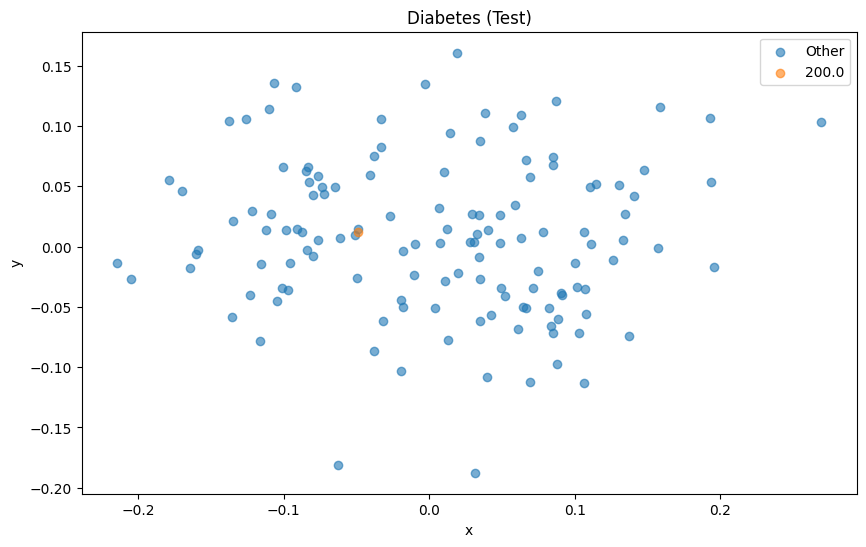

In [32]:
trainDiabDataframe = newReducedDiabDataframe.sample(frac=0.7, random_state=12)
testDiabDataframe = newReducedDiabDataframe.drop(trainDiabDataframe.index)

plotData(trainDiabDataframe, "Diabetes (Train)")
plotData(testDiabDataframe, "Diabetes (Test)")

trainDiabDataframe.to_csv('./cleanedDatasets/diabetes/train.csv', index=False)
testDiabDataframe.to_csv('./cleanedDatasets/diabetes/test.csv', index=False)

### Breast Cancer Wisconsin (Diagnostic)

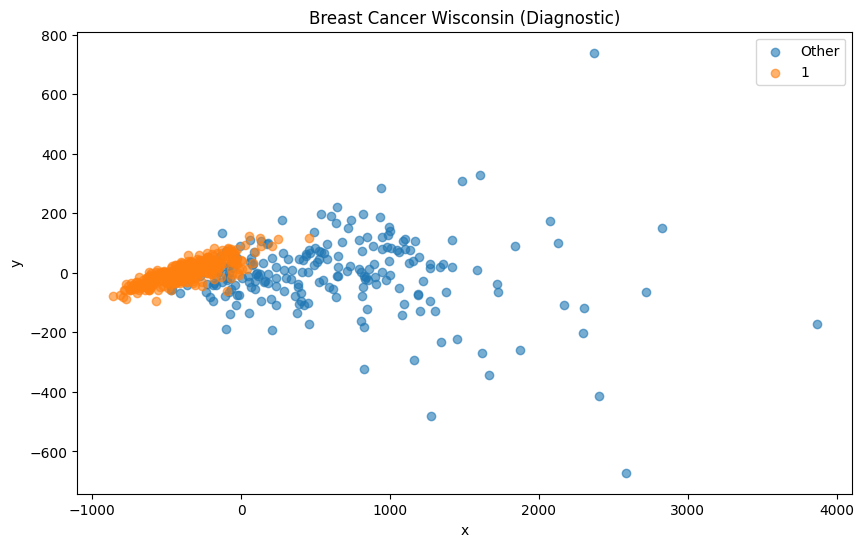

In [33]:
reducedCancerDataframe = reduce2DPCA(cancerDataframe)

reducedCancerDataframe['label'] = reducedCancerDataframe['label'].astype(str)
reducedCancerDataframe.loc[reducedCancerDataframe['label'] != '1', 'label'] = 'Other'

plotData(reducedCancerDataframe, "Breast Cancer Wisconsin (Diagnostic)")

Veja que esse dataset já possui apenas dois rótulos, logo não precisamos tentar reduzi-lo. Além disso, podemos verificar que os dados são claramente não separáveis. Assim, vamos separar os dados de treinamento e teste:

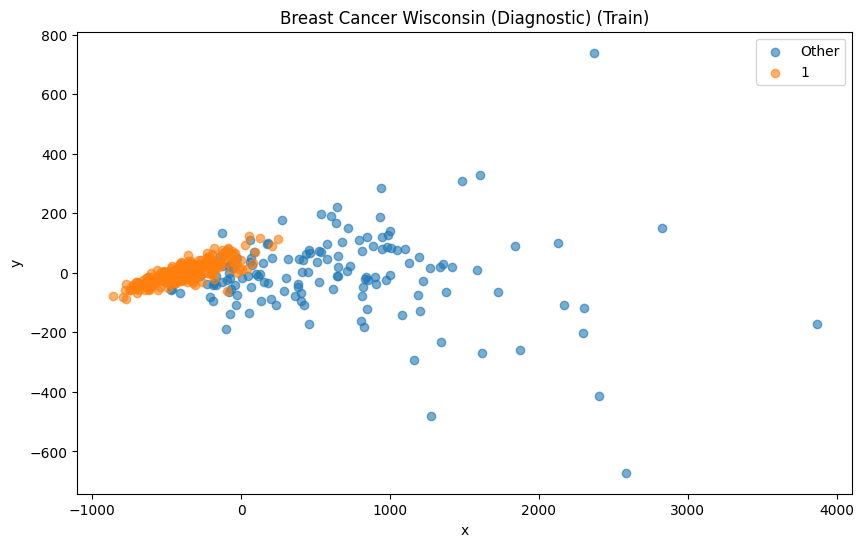

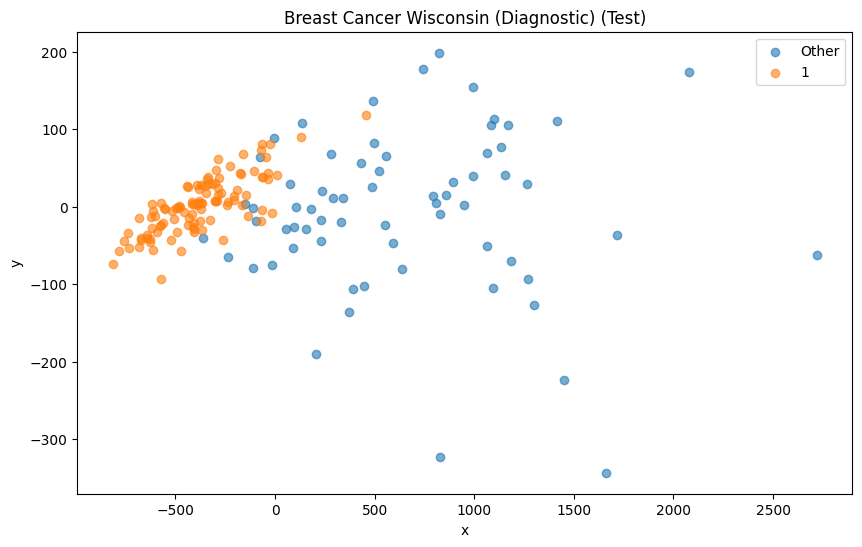

In [34]:
trainCancerDataframe = reducedCancerDataframe.sample(frac=0.7, random_state=12)
testCancerDataframe = reducedCancerDataframe.drop(trainCancerDataframe.index)

plotData(trainCancerDataframe, "Breast Cancer Wisconsin (Diagnostic) (Train)")
plotData(testCancerDataframe, "Breast Cancer Wisconsin (Diagnostic) (Test)")

trainCancerDataframe.to_csv('./cleanedDatasets/breastCancer/train.csv', index=False)
testCancerDataframe.to_csv('./cleanedDatasets/breastCancer/test.csv', index=False)

Dado que os dados de treinamento não são separáveis, vamos duplicar os dados de treinamento, e na duplicação vamos induzir uma separabilidade nos dados de treinamento para comparar os resultados do modelo tanto no dataset original (não separável) quanto no dataset com a separabilidade induzida durante o treinamento.

Para isso, eliminaremos todos os dados na faixa vertical delimitada pelas seguintes verticais:

- A reta vertical que corta o dado mais a esquerda do rótulo 1
- A reta vertical que corta o dado mais a direita do rótulo 'Other'

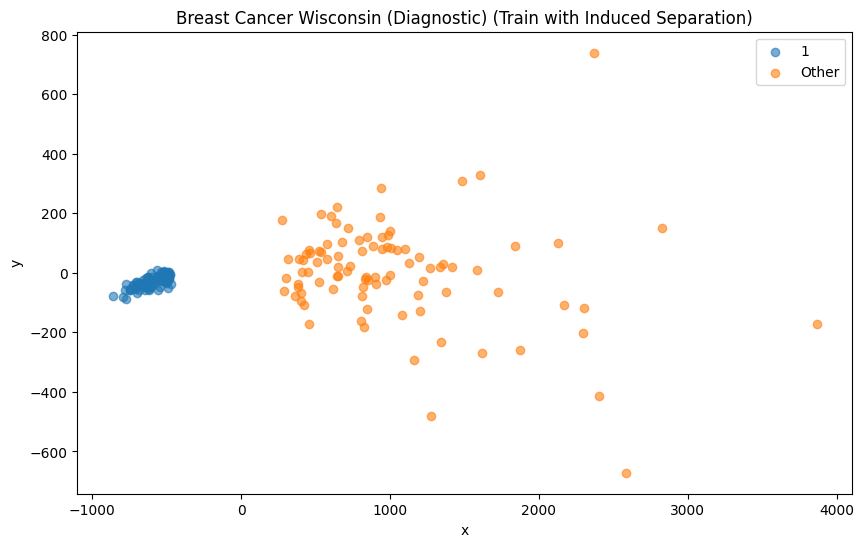

In [35]:
leftmostX = trainCancerDataframe[trainCancerDataframe['label'] == 'Other']['x'].min()

rightmostX = trainCancerDataframe[trainCancerDataframe['label'] == '1']['x'].max()

separatInducedCancerDataframe = trainCancerDataframe[~((trainCancerDataframe['x'] >= leftmostX) & (trainCancerDataframe['x'] <= rightmostX))]

plotData(separatInducedCancerDataframe, "Breast Cancer Wisconsin (Diagnostic) (Train with Induced Separation)")
separatInducedCancerDataframe.to_csv('./cleanedDatasets/breastCancer/trainInducedSeparation.csv', index=False)



### Spotify

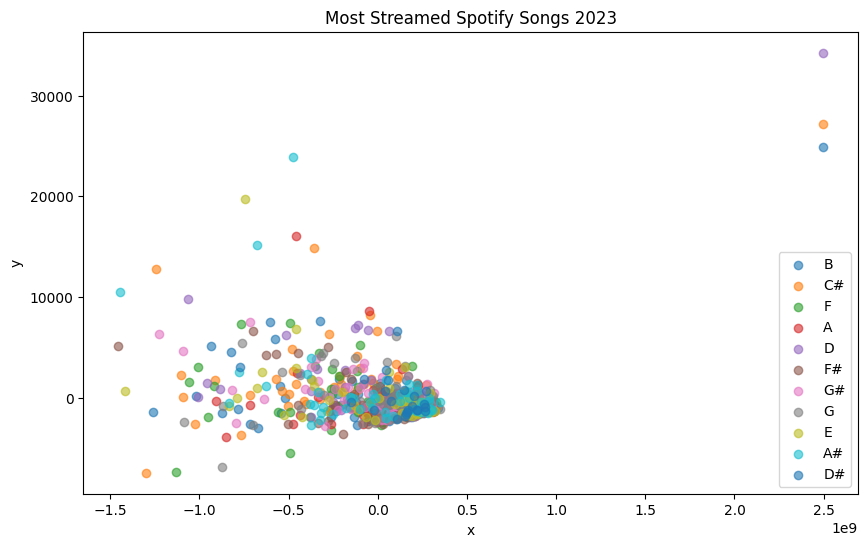

In [36]:
reducedSpotDataframe = reduce2DPCA(spotifyDataframe)

plotData(reducedSpotDataframe, "Most Streamed Spotify Songs 2023")

Veja que esses dados também são difíceis de encontrar uma separabilidade de rótulos. Vamos plotar todos os rótulos contra todos:

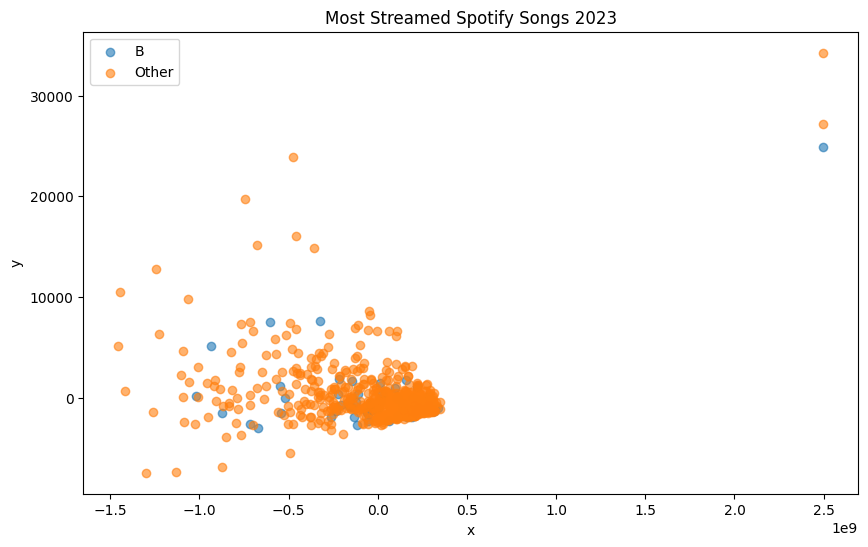

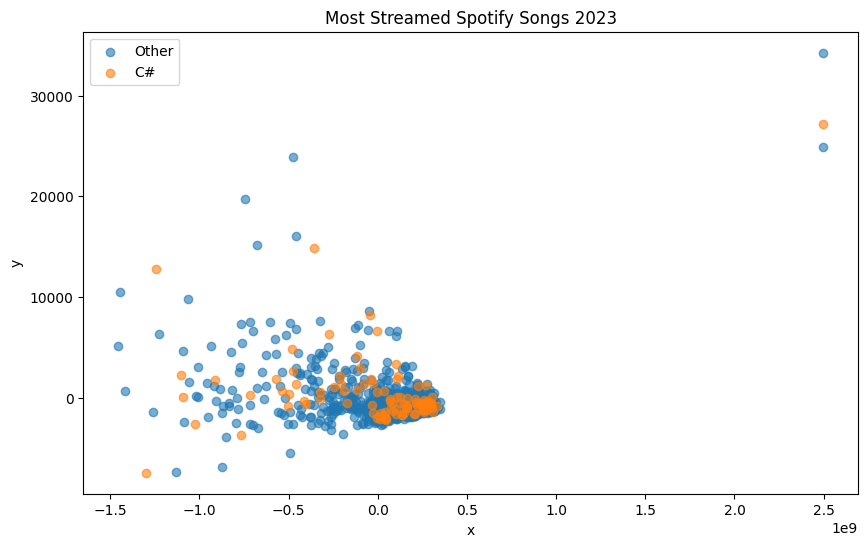

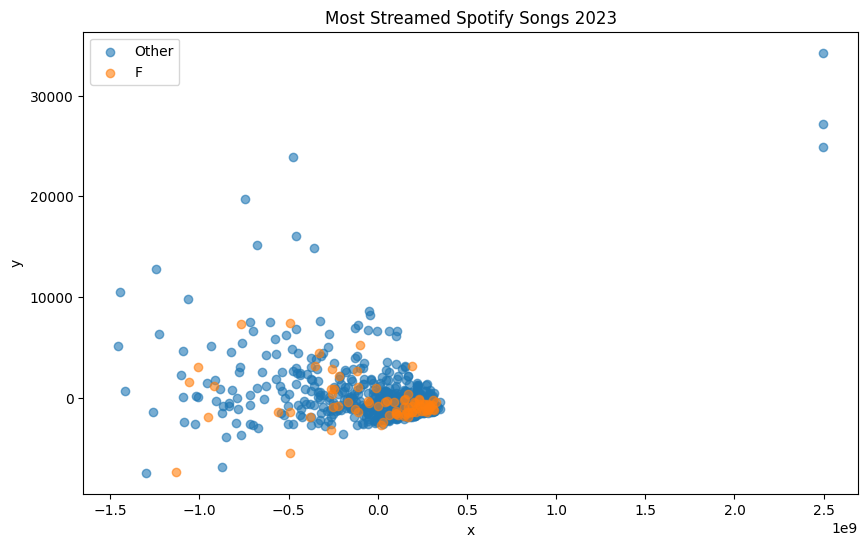

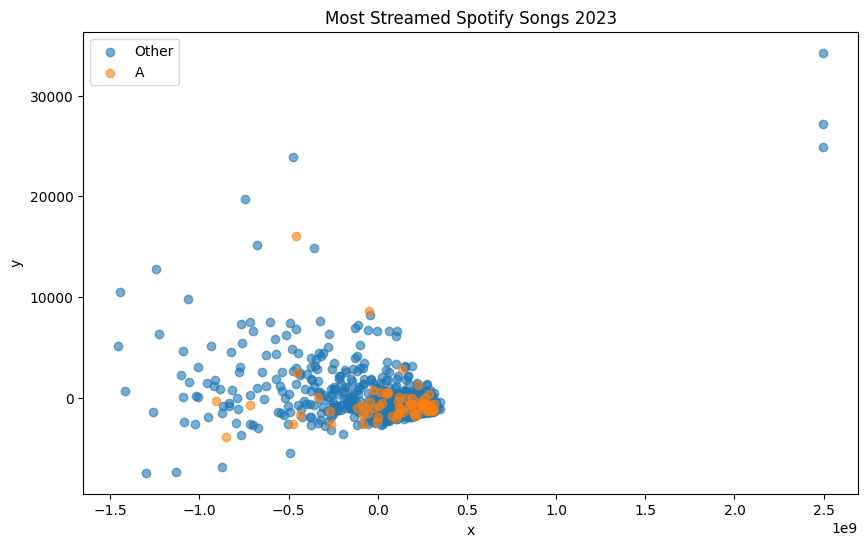

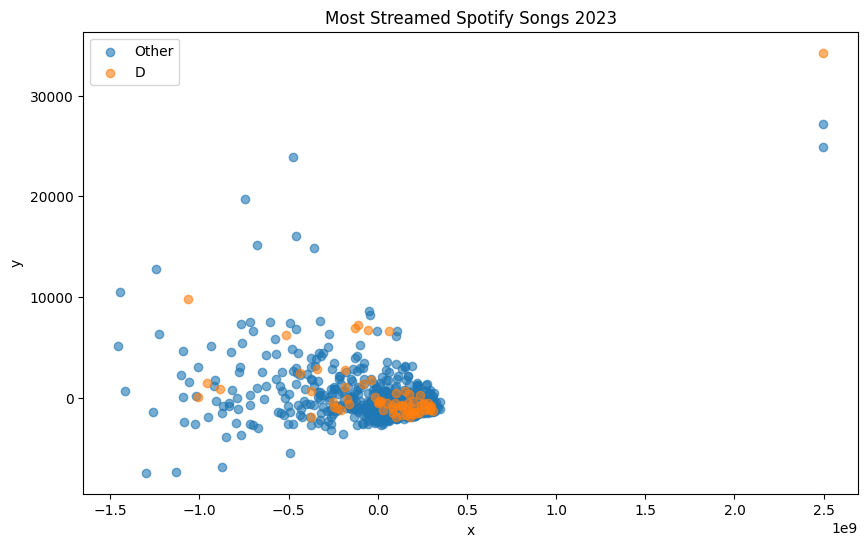

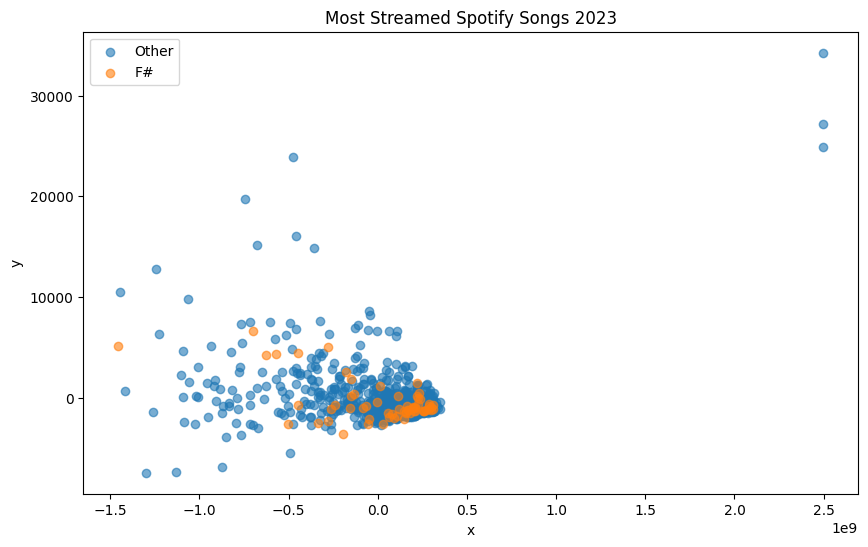

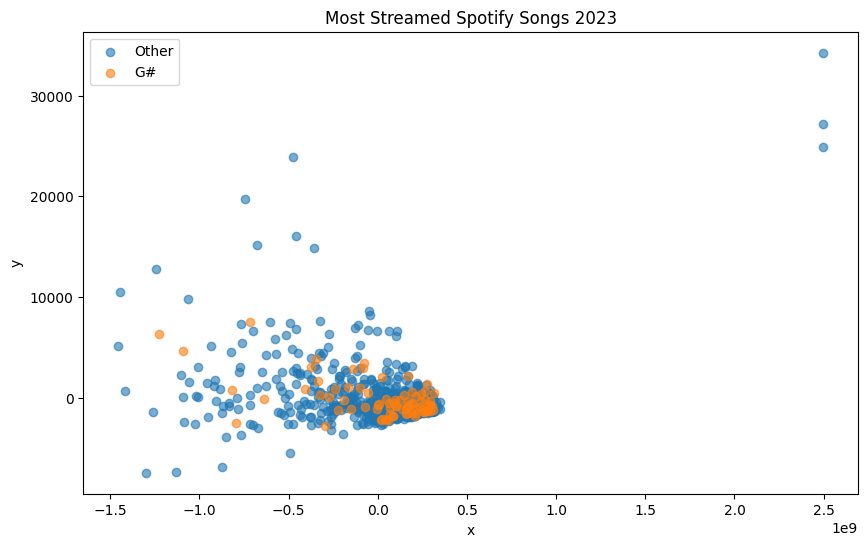

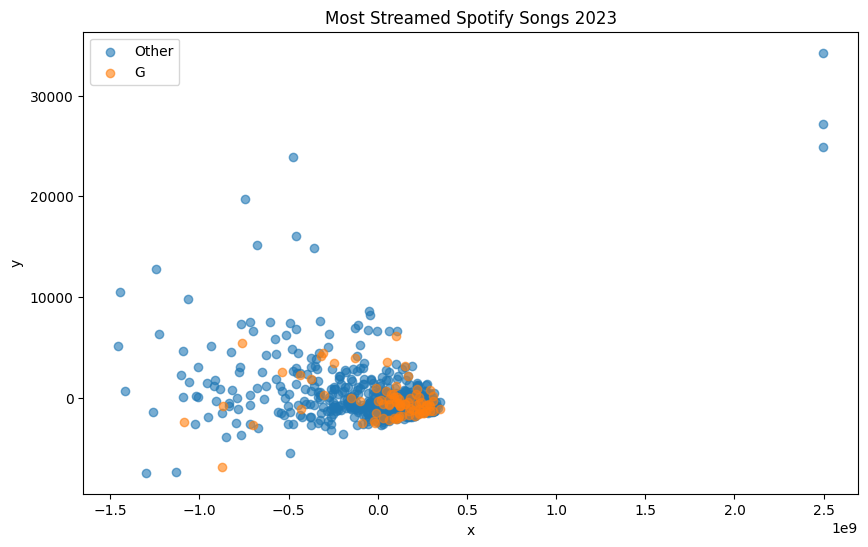

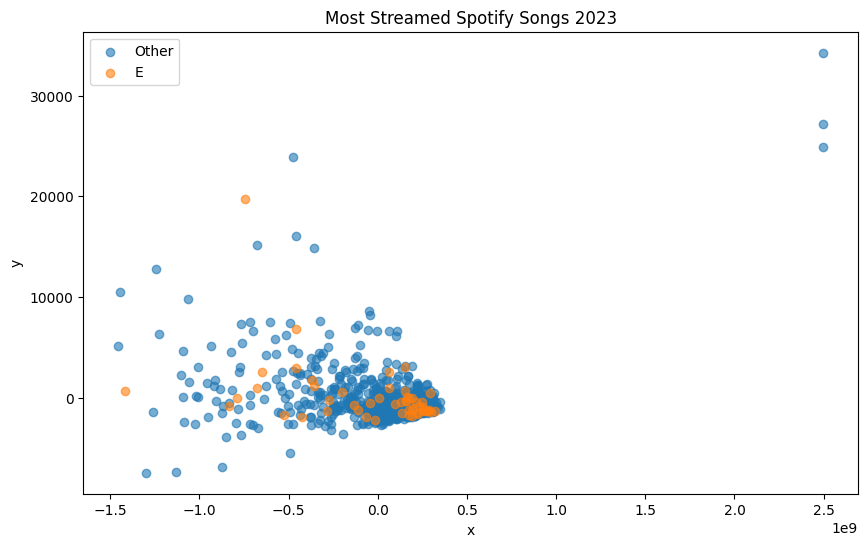

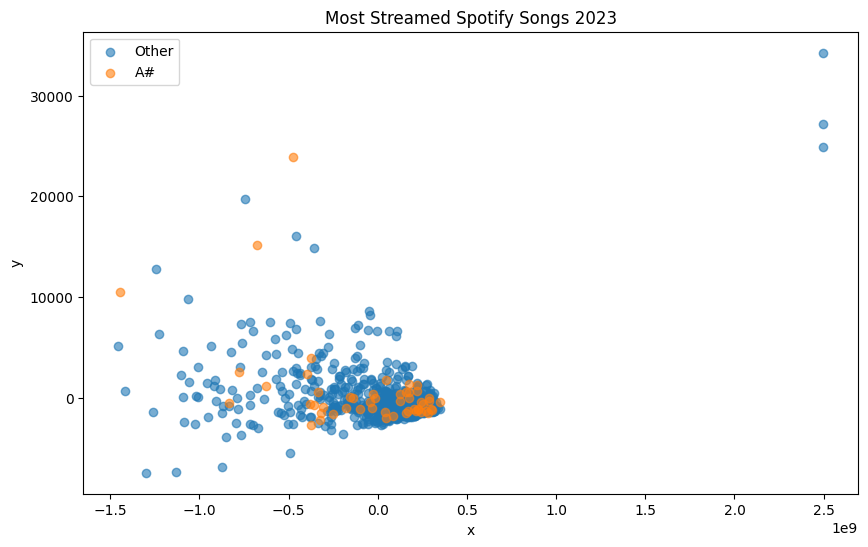

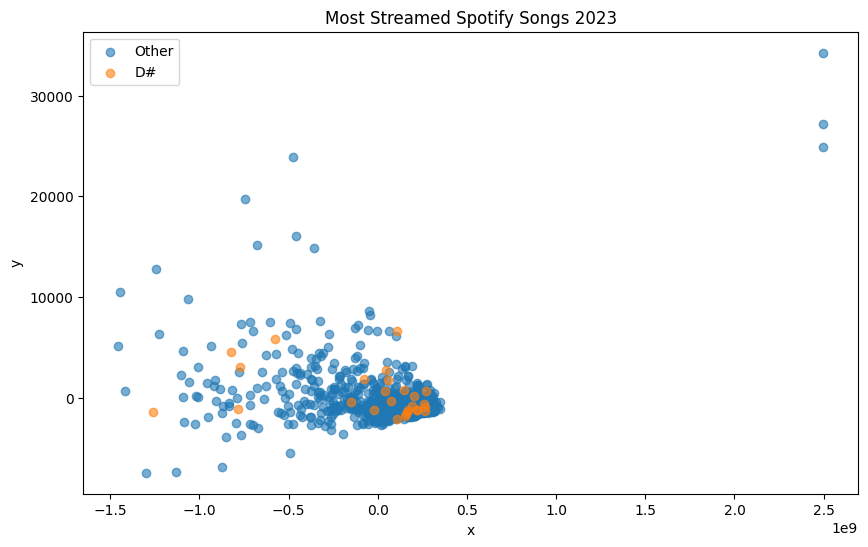

In [37]:
uniqueSpotifyTargs = reducedSpotDataframe['label'].unique()

for targ in uniqueSpotifyTargs:
    
    newTargSpotifyDataframe = reducedSpotDataframe.copy()
    
    newTargSpotifyDataframe['label'] = newTargSpotifyDataframe['label'].apply(lambda x: targ if x == targ else 'Other')

    reduceAndPlot(newTargSpotifyDataframe, "Most Streamed Spotify Songs 2023")

Visto que não há maneira clara de separar os rótulos, vamos apenas escolher arbitrariamente o rótulo D# contra todos os outros rótulos. Depois, já separaremos os dados de treinamento e teste:

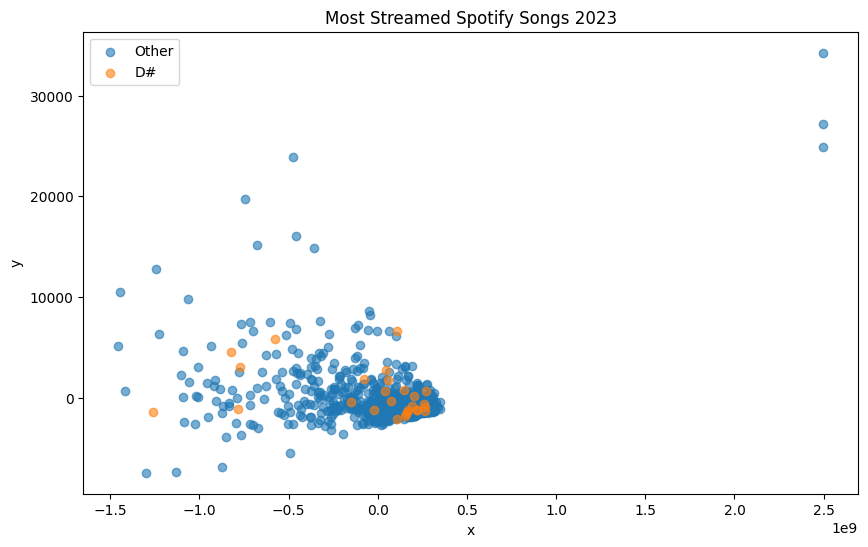

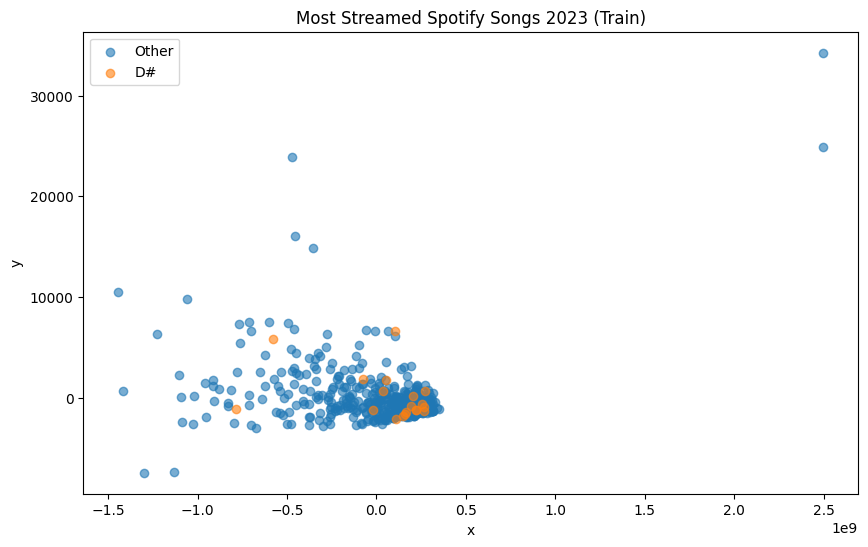

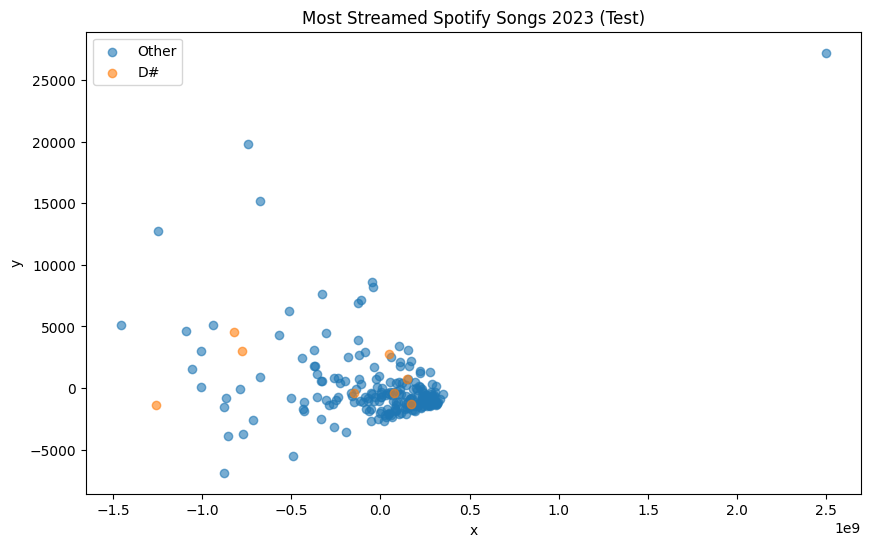

In [38]:
newReducedSpotifyDataframe = reducedSpotDataframe.copy()
    
newReducedSpotifyDataframe['label'] = newReducedSpotifyDataframe['label'].apply(lambda x: 'D#' if x == 'D#' else 'Other')

plotData(newReducedSpotifyDataframe, "Most Streamed Spotify Songs 2023")

trainSpotifyDataframe = newReducedSpotifyDataframe.sample(frac=0.7, random_state=12)
testSpotifyDataframe = newReducedSpotifyDataframe.drop(trainSpotifyDataframe.index)

plotData(trainSpotifyDataframe, "Most Streamed Spotify Songs 2023 (Train)")
plotData(testSpotifyDataframe, "Most Streamed Spotify Songs 2023 (Test)")

trainSpotifyDataframe.to_csv('./cleanedDatasets/spotify/train.csv', index=False)
testSpotifyDataframe.to_csv('./cleanedDatasets/spotify/test.csv', index=False)

### Mobile Price Classification

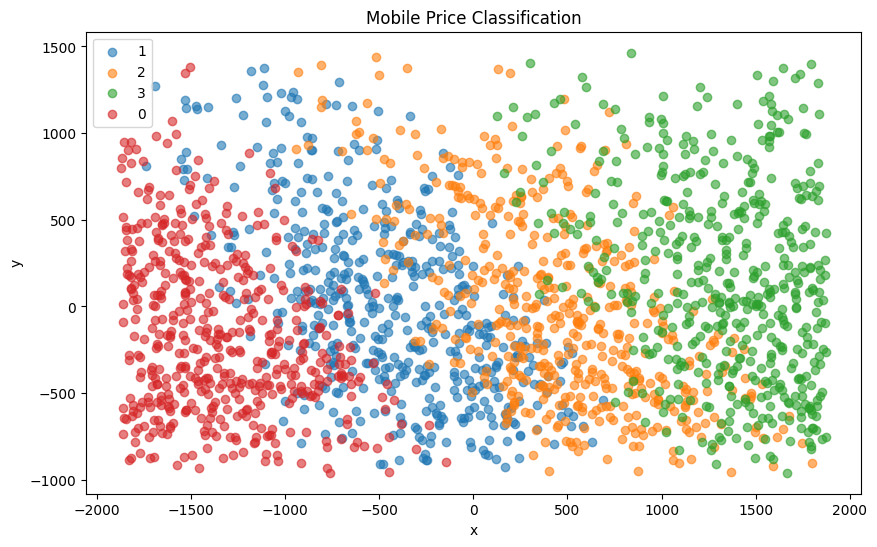

In [39]:
reduceMobileDataframe = reduce2DPCA(mobileDataframe)

plotData(reduceMobileDataframe, "Mobile Price Classification")

Veja que nesse caso, se fizermos uma separação de rótulos de um rótulo contra todos os outros, teremos um dataset não separável. Contudo, se eliminarmos os dados de rótulo 1 e 2, o dataset será separável:

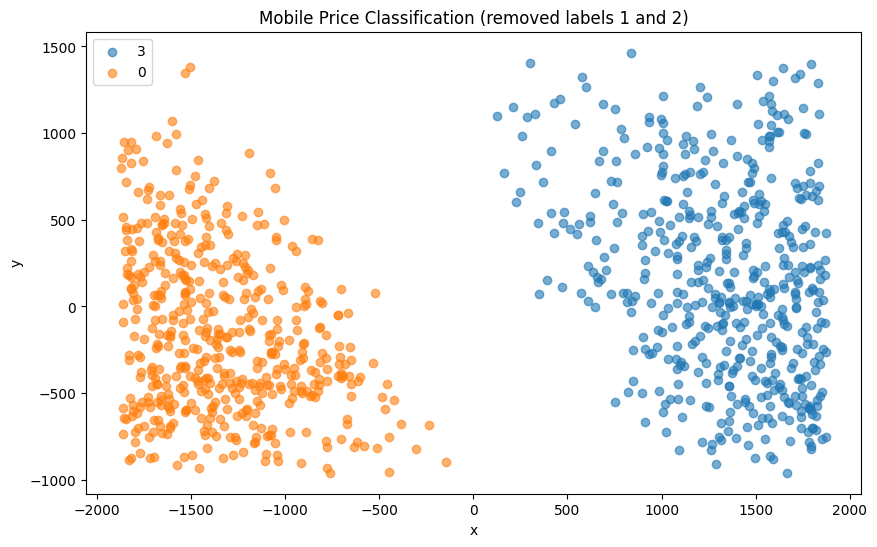

In [40]:
newLabelMobileDataframe = reduceMobileDataframe[~reduceMobileDataframe['label'].isin([1, 2])]

plotData(newLabelMobileDataframe, "Mobile Price Classification (removed labels 1 and 2)")


Visto a separabilidade dos dados, vamos separar os dados de treinamento e teste:

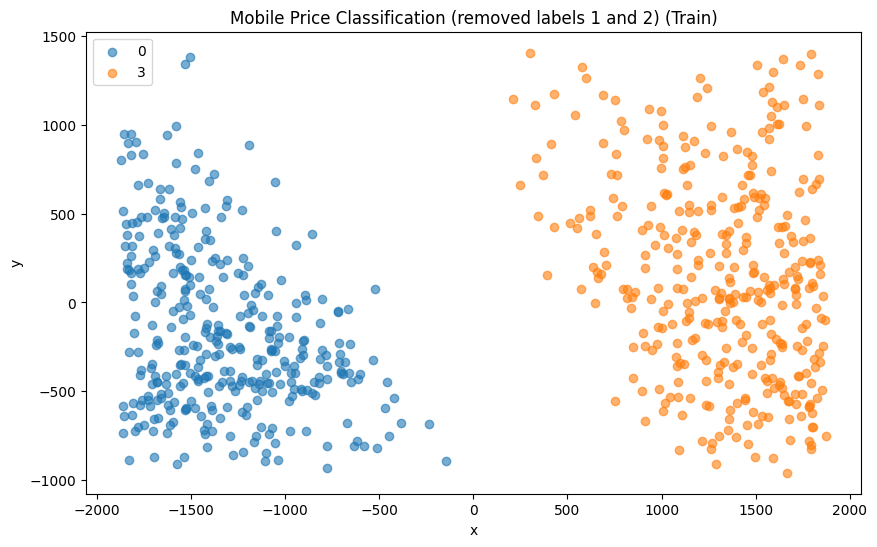

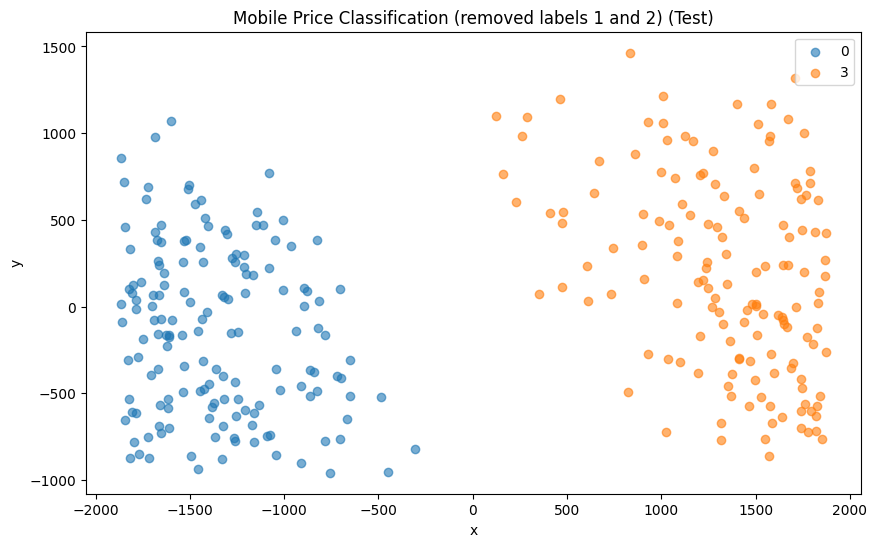

In [41]:
trainMobileDataframe = newLabelMobileDataframe.sample(frac=0.7, random_state=12)
testMobileDataframe = newLabelMobileDataframe.drop(trainMobileDataframe.index)

plotData(trainMobileDataframe, "Mobile Price Classification (removed labels 1 and 2) (Train)")
plotData(testMobileDataframe, "Mobile Price Classification (removed labels 1 and 2) (Test)")

trainMobileDataframe.to_csv('./cleanedDatasets/mobile/train.csv', index=False)
testMobileDataframe.to_csv('./cleanedDatasets/mobile/test.csv', index=False)

### make_classification Generated Data

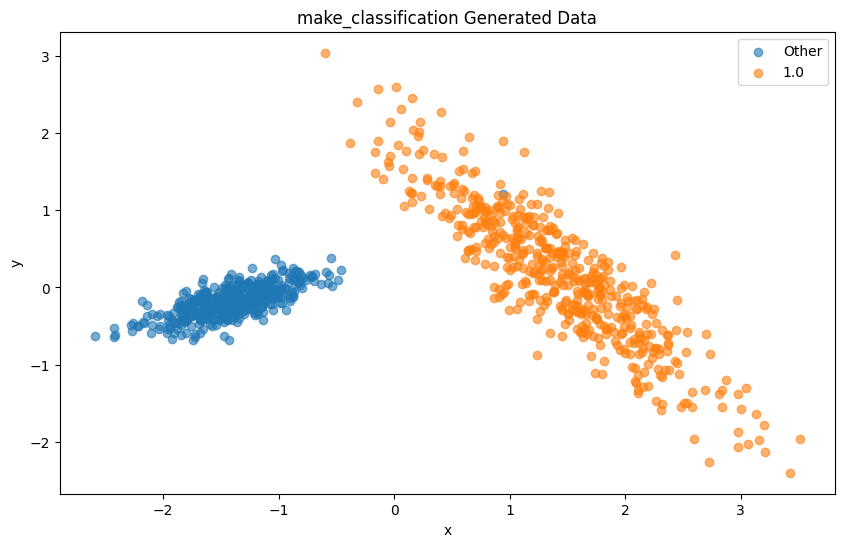

In [42]:
reducedGenClassDataframe = reduce2DPCA(genClassDataframe)

reducedGenClassDataframe['label'] = reducedGenClassDataframe['label'].astype(str)
reducedGenClassDataframe.loc[reducedGenClassDataframe['label'] != '1.0', 'label'] = 'Other'

plotData(reducedGenClassDataframe, "make_classification Generated Data")

Veja que esse dataset não é separável. Vamos separar os dados para treinamento e teste. Como veremos a seguir, os dados de treinamento serão separáveis e os dados de teste não, então de maneira não intencional induzimos a separabilidade dos dados de treinamento ao fazermos o sampling aleatório.

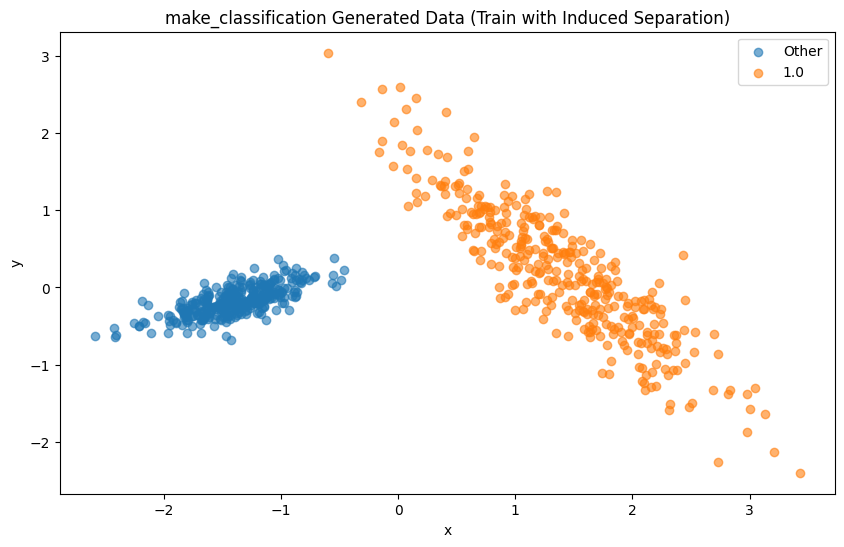

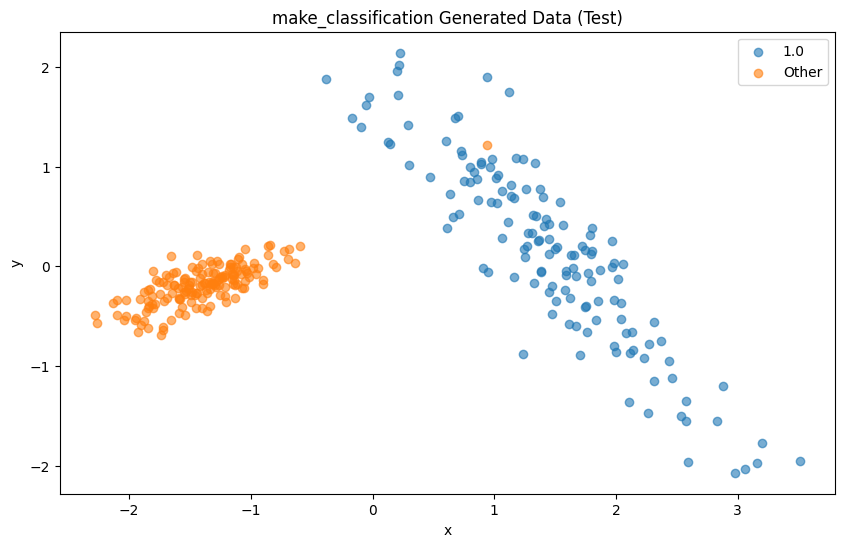

In [43]:
trainGenClassDataframe = reducedGenClassDataframe.sample(frac=0.7, random_state=12)
testGenClassDataframe = reducedGenClassDataframe.drop(trainGenClassDataframe.index)

plotData(trainGenClassDataframe, "make_classification Generated Data (Train with Induced Separation)")
plotData(testGenClassDataframe, "make_classification Generated Data (Test)")

trainGenClassDataframe.to_csv('./cleanedDatasets/makeClassification/train.csv', index=False)
testGenClassDataframe.to_csv('./cleanedDatasets/makeClassification/test.csv', index=False)

### make_blobs Generated Data

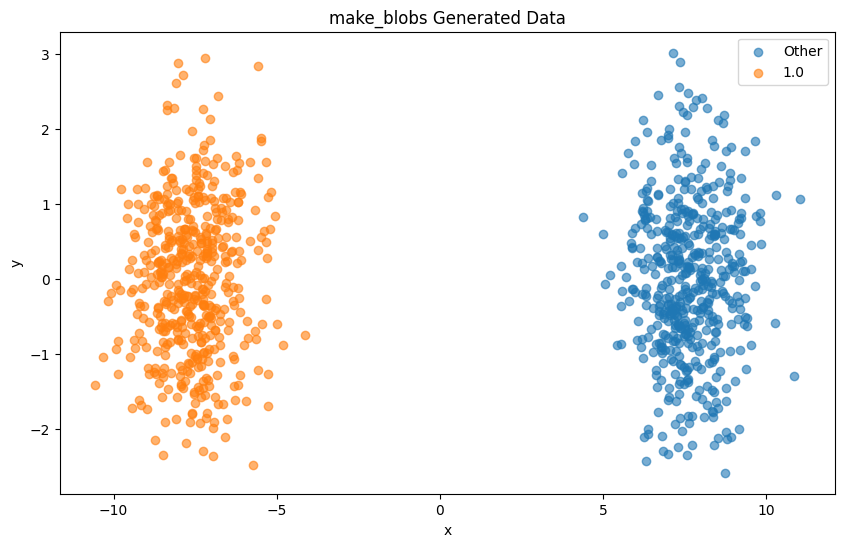

In [44]:
reducedGenBlobDataframe = reduce2DPCA(genBlobDataframe)

reducedGenBlobDataframe['label'] = reducedGenBlobDataframe['label'].astype(str)
reducedGenBlobDataframe.loc[reducedGenBlobDataframe['label'] != '1.0', 'label'] = 'Other'

plotData(reducedGenBlobDataframe, "make_blobs Generated Data")

Esses dados são totalmente separáveis. A seguir, vamos separar os dados de treinamento e de teste:

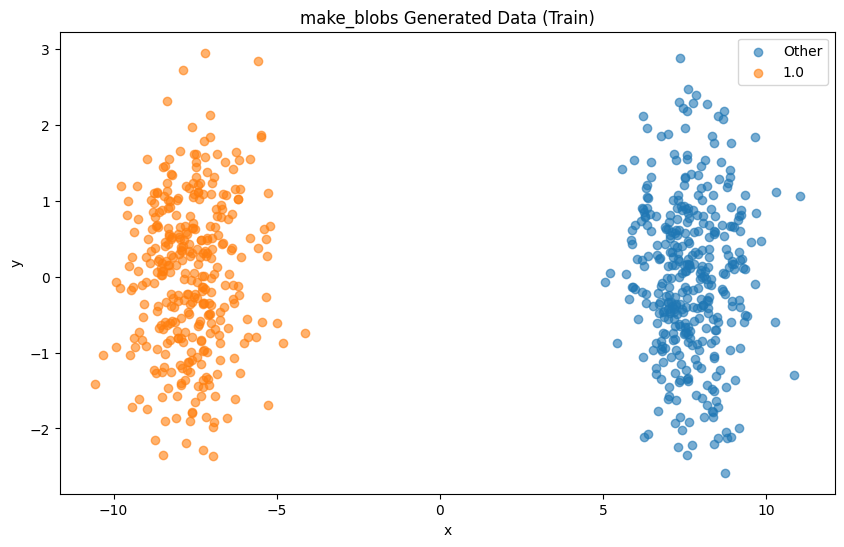

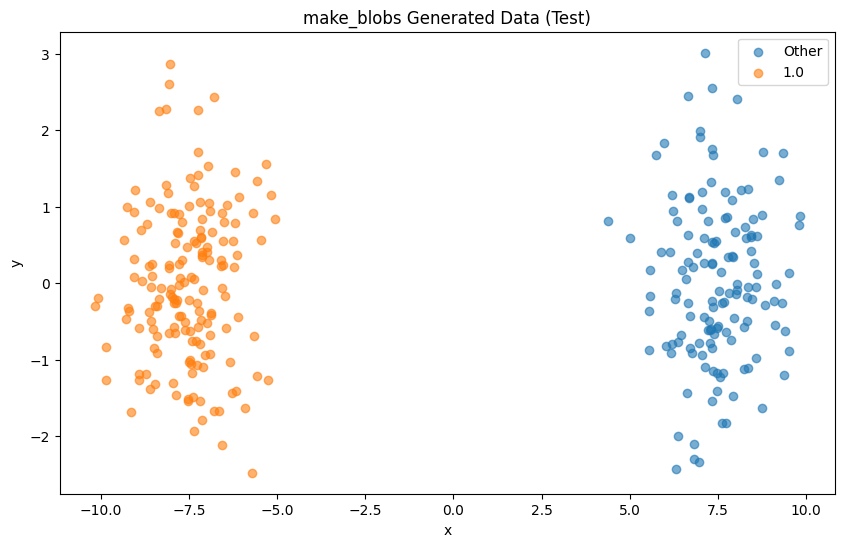

In [45]:
trainGenBlobDataframe = reducedGenBlobDataframe.sample(frac=0.7, random_state=12)
testGenBlobDataframe = reducedGenBlobDataframe.drop(trainGenBlobDataframe.index)

plotData(trainGenBlobDataframe, "make_blobs Generated Data (Train)")
plotData(testGenBlobDataframe, "make_blobs Generated Data (Test)")

trainGenBlobDataframe.to_csv('./cleanedDatasets/makeBlob/train.csv', index=False)
testGenBlobDataframe.to_csv('./cleanedDatasets/makeBlob/test.csv', index=False)